# UK Accidents Data Exploraion
## by (Mervat Khaled)

## Dataset Overview:

This data provide detailes about the circumstances of personal injury road accidents in Great Britain from 2005 to 2014, the types of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. Information on damage-only accidents, with no human casualties or accidents on private roads or car parks are not included in this data.

## Content:

There are 3 CSVs in this set. Accidents are the primary ones and have references by Accident Index to the casualties and vehicles tables with 1640597 unique accident's index.

Accident file: main data set contains information about accident severity, weather, location, date, hour, day of week, road type, etc…

Vehicle file: contains information about vehicle type, vehicle model, engine size, driver sex, driver age, car age…

Casualty file: contains information about casualty severity, age, sex social class, casualty type(pedestrian or car passenger)…

Lookup file: contains the text description of all variable code in the three files. 

#### this Data is available on [Kaggle](https://www.kaggle.com/benoit72/uk-accidents-10-years-history-with-many-variables).


## Investigation Overview: 

> In this investigation, I wanted to look at  what causes Serious and Not Serious accidens. The main focus was on: 
road type, vehicle type, time, age of driver, age of vehicle, Driver IMd deprivation...

# Table of contents:
<ul>
<li><a href="#clean">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#mu">Multivariate Exploration</a></li>        
<!-- <li><a href="#conclusions">Conclusions</a></li> -->
</ul>

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.options.display.float_format='{:,.2f}'.format
import re

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
accidents_data=pd.read_csv('data\Accidents0514.csv'\
                      ,low_memory=False)

In [3]:
casuality_data=pd.read_csv('data\Casualties0514.csv')

In [4]:
vehicles_data=pd.read_csv('data\Vehicles0514.csv')

In [5]:
display(accidents_data.head())
print('-'*80)
display(casuality_data.head())
print('-'*80)
display(vehicles_data.head())

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,"525,680.00","178,240.00",-0.19,51.49,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,"524,170.00","181,650.00",-0.21,51.52,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,"524,520.00","182,240.00",-0.21,51.53,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,"526,900.00","177,530.00",-0.17,51.48,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,"528,060.00","179,040.00",-0.16,51.50,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


--------------------------------------------------------------------------------


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


--------------------------------------------------------------------------------


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


In [6]:
display(accidents_data.info())
print('-'*80)
display(casuality_data.info())
print('-'*80)
display(vehicles_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
Accident_Index                                 1640597 non-null object
Location_Easting_OSGR                          1640486 non-null float64
Location_Northing_OSGR                         1640486 non-null float64
Longitude                                      1640486 non-null float64
Latitude                                       1640486 non-null float64
Police_Force                                   1640597 non-null int64
Accident_Severity                              1640597 non-null int64
Number_of_Vehicles                             1640597 non-null int64
Number_of_Casualties                           1640597 non-null int64
Date                                           1640597 non-null object
Day_of_Week                                    1640597 non-null int64
Time                                           1640464 non-null object
Local_Authority_(District)          

None

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
Accident_Index                        object
Vehicle_Reference                     int64
Casualty_Reference                    int64
Casualty_Class                        int64
Sex_of_Casualty                       int64
Age_of_Casualty                       int64
Age_Band_of_Casualty                  int64
Casualty_Severity                     int64
Pedestrian_Location                   int64
Pedestrian_Movement                   int64
Car_Passenger                         int64
Bus_or_Coach_Passenger                int64
Pedestrian_Road_Maintenance_Worker    int64
Casualty_Type                         int64
Casualty_Home_Area_Type               int64
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


None

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
Accident_Index                      object
Vehicle_Reference                   int64
Vehicle_Type                        int64
Towing_and_Articulation             int64
Vehicle_Manoeuvre                   int64
Vehicle_Location-Restricted_Lane    int64
Junction_Location                   int64
Skidding_and_Overturning            int64
Hit_Object_in_Carriageway           int64
Vehicle_Leaving_Carriageway         int64
Hit_Object_off_Carriageway          int64
1st_Point_of_Impact                 int64
Was_Vehicle_Left_Hand_Drive?        int64
Journey_Purpose_of_Driver           int64
Sex_of_Driver                       int64
Age_of_Driver                       int64
Age_Band_of_Driver                  int64
Engine_Capacity_(CC)                int64
Propulsion_Code                     int64
Age_of_

None

### What is the structure of your dataset?

There are 3 CSVs in this set. Accidents are the primary ones and have references by Accident Index to the casualties and vehicles tables with 1640597 unique accident's index.

Accident file: main data set contains information about accident severity, weather, location, date, hour, day of week, road type, etc…

Vehicle file: contains information about vehicle type, vehicle model, engine size, driver sex, driver age, car age…

Casualty file: contains information about casualty severity, age, sex social class, casualty type(pedestrian or car passenger)…

Lookup file: contains the text description of all variable code in the three files. 
### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features affect more on the accident severity.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that road type, vehicle type, time, age of driver, age of vehicle, Driver IMd deprivation, will have the strongest effect on each accident severity.

<a id='clean'></a>
# Data Wrangling:
* Map column code with their text strings from a lookup table.
* drop irrelevent columns
* Merge different files
<li><a href="#imp">Imputing missing values with machine learning</a></li> 

### 1- Accident Data 

In [7]:
accidents_data.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,"525,680.00","178,240.00",-0.19,51.49,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,"524,170.00","181,650.00",-0.21,51.52,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909


In [8]:
accidents_data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

There are some columns that should be mapped with their text strings from a lookup table to be more informative.
So we will extract these values from a variable look-up file "excel file", and each sheet in this file represents the feature values for each dataset. 

In [1]:
import xlrd

In [2]:
path=r'data\variable lookup.xls'
book=xlrd.open_workbook(path)

In [3]:
sheets=[]
for sheet in book.sheets():
    sheets.append(sheet.name)

In [12]:
sheets[:10]

['Introduction',
 'Export Variables',
 'Police Force',
 'Accident Severity',
 'Day of Week',
 'Local Authority (District)',
 'Local Authority (Highway)',
 '1st Road Class',
 'Road Type',
 'Speed Limit']

In [4]:
# select accident sheets
accident_sheets=sheets[2:22]
accident_sheets

['Police Force',
 'Accident Severity',
 'Day of Week',
 'Local Authority (District)',
 'Local Authority (Highway)',
 '1st Road Class',
 'Road Type',
 'Speed Limit',
 'Junction Detail',
 'Junction Control',
 '2nd Road Class',
 'Ped Cross - Human',
 'Ped Cross - Physical',
 'Light Conditions',
 'Weather',
 'Road Surface',
 'Special Conditions at Site',
 'Carriageway Hazards',
 'Urban Rural',
 'Police Officer Attend']

In [7]:
# accidents_data sheets
accident_lookup_table=pd.read_excel(path,sheet_name=accident_sheets,index_col=None)
type(accident_lookup_table)

collections.OrderedDict

In [8]:
accident_lookup_table.keys()

odict_keys(['Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Speed Limit', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend'])

In [16]:
accident_lookup_table.items()

odict_items([('Police Force',     code                  label
0      1    Metropolitan Police
1      3                Cumbria
2      4             Lancashire
3      5             Merseyside
4      6     Greater Manchester
5      7               Cheshire
6     10            Northumbria
7     11                 Durham
8     12        North Yorkshire
9     13         West Yorkshire
10    14        South Yorkshire
11    16             Humberside
12    17              Cleveland
13    20          West Midlands
14    21          Staffordshire
15    22            West Mercia
16    23           Warwickshire
17    30             Derbyshire
18    31        Nottinghamshire
19    32           Lincolnshire
20    33         Leicestershire
21    34       Northamptonshire
22    35         Cambridgeshire
23    36                Norfolk
24    37                Suffolk
25    40           Bedfordshire
26    41          Hertfordshire
27    42                  Essex
28    43          Thames Valley
29    44  

In [9]:
def nasted_dict_to_map_var_string_label(lookup_table):
    nasted_dict={}
    for i, (key, element) in enumerate(lookup_table.items()):
        nasted_dict[key]=dict(element.values)

    return nasted_dict

In [10]:
accident_nasted_dict=nasted_dict_to_map_var_string_label(accident_lookup_table)
accident_nasted_dict['Accident Severity']

{1: 'Fatal', 2: 'Serious', 3: 'Slight'}

In [19]:
accidents_data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [20]:
accident_nasted_dict.keys()

dict_keys(['Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Speed Limit', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend'])

In [21]:
# change cols names to match variables names on sheets
accidents_data.rename(columns=lambda x: re.sub('_',' ',x),inplace=True)
accidents_data.rename(columns={'Pedestrian Crossing Human Control':'Ped Cross - Human', 
                       'Pedestrian Crossing Human Control':'Ped Cross - Physical','Weather Conditions':'Weather',
                       'Urban or Rural Area':'Urban Rural','Road Surface Conditions':'Road Surface',
                       'Did Police Officer Attend Scene of Accident':'Police Officer Attend'
    
},inplace=True)

In [22]:
accidents_data.columns

Index(['Accident Index', 'Location Easting OSGR', 'Location Northing OSGR',
       'Longitude', 'Latitude', 'Police Force', 'Accident Severity',
       'Number of Vehicles', 'Number of Casualties', 'Date', 'Day of Week',
       'Time', 'Local Authority (District)', 'Local Authority (Highway)',
       '1st Road Class', '1st Road Number', 'Road Type', 'Speed limit',
       'Junction Detail', 'Junction Control', '2nd Road Class',
       '2nd Road Number', 'Pedestrian Crossing-Human Control',
       'Pedestrian Crossing-Physical Facilities', 'Light Conditions',
       'Weather', 'Road Surface', 'Special Conditions at Site',
       'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend',
       'LSOA of Accident Location'],
      dtype='object')

In [23]:
def map_values(data,nasted_dict):
    
    new_values=data.replace(nasted_dict,inplace=True)
    return new_values

In [24]:
map_values(accidents_data,accident_nasted_dict)

In [25]:
accidents_data.head(3)

,Accident Index,Location Easting OSGR,Location Northing OSGR,Longitude,Latitude,Police Force,Accident Severity,Number of Vehicles,Number of Casualties,Date,Day of Week,Time,Local Authority (District),Local Authority (Highway),1st Road Class,1st Road Number,Road Type,Speed limit,Junction Detail,Junction Control,2nd Road Class,2nd Road Number,Pedestrian Crossing-Human Control,Pedestrian Crossing-Physical Facilities,Light Conditions,Weather,Road Surface,Special Conditions at Site,Carriageway Hazards,Urban Rural,Police Officer Attend,LSOA of Accident Location
0,200501BS00001,"525,680.00","178,240.00",-0.19,51.49,Metropolitan Police,Serious,1,1,04/01/2005,Tuesday,17:42,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,-1,0,0,1,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,E01002849
1,200501BS00002,"524,170.00","181,650.00",-0.21,51.52,Metropolitan Police,Slight,1,1,05/01/2005,Wednesday,17:36,Kensington and Chelsea,Kensington and Chelsea,B,450,Dual carriageway,30,Crossroads,Auto traffic signal,C,0,0,5,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01002909
2,200501BS00003,"524,520.00","182,240.00",-0.21,51.53,Metropolitan Police,Slight,2,1,06/01/2005,Thursday,00:15,Kensington and Chelsea,Kensington and Chelsea,C,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,-1,0,0,0,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01002857


In [26]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
Accident Index                             1640597 non-null object
Location Easting OSGR                      1640486 non-null float64
Location Northing OSGR                     1640486 non-null float64
Longitude                                  1640486 non-null float64
Latitude                                   1640486 non-null float64
Police Force                               1640597 non-null object
Accident Severity                          1640597 non-null object
Number of Vehicles                         1640597 non-null int64
Number of Casualties                       1640597 non-null int64
Date                                       1640597 non-null object
Day of Week                                1640597 non-null object
Time                                       1640464 non-null object
Local Authority (District)                 1640597 non-null object
Local Authorit

In [27]:
def reduce_memory_usage(data):
    for col in data.columns:
        
        if data[col].dtype == 'int64':
            data[col]=data[col].astype('int8')
        elif data[col].dtype == 'float64':
            data[col]=data[col].astype('float16')
        elif data[col].dtype == 'object':   
            data[col]=data[col].astype('category') 
    return data.info()  

In [28]:
reduce_memory_usage(accidents_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
Accident Index                             1640597 non-null category
Location Easting OSGR                      1640486 non-null float16
Location Northing OSGR                     1640486 non-null float16
Longitude                                  1640486 non-null float16
Latitude                                   1640486 non-null float16
Police Force                               1640597 non-null category
Accident Severity                          1640597 non-null category
Number of Vehicles                         1640597 non-null int8
Number of Casualties                       1640597 non-null int8
Date                                       1640597 non-null category
Day of Week                                1640597 non-null category
Time                                       1640464 non-null category
Local Authority (District)                 1640597 non-null category
Lo

In [29]:
def normalize_cols_names(cols):
    new_names=[re.sub('\W+','_',x.lower()) for x in cols]
    for index in range(len(new_names)):
        if new_names[index].endswith('_'):
            new_names[index]=new_names[index][:-1]
            
    return new_names

In [30]:
accidents_data.columns = normalize_cols_names(accidents_data.columns)
accidents_data.columns

Index(['accident_index', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_highway',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather', 'road_surface', 'special_conditions_at_site',
       'carriageway_hazards', 'urban_rural', 'police_officer_attend',
       'lsoa_of_accident_location'],
      dtype='object')

# Drop irrelevent columns

In [31]:
# In this analysis we are not interseted about location features that much so we find this features irrelevent, however
# maybe we will use urban and rulral feature and local_authority_district for  location info. 
accidents_data.drop(['location_easting_osgr','location_northing_osgr','longitude','police_force','local_authority_highway'
             ,'1st_road_number','2nd_road_class','2nd_road_number','latitude',\
              'lsoa_of_accident_location'],inplace=True,axis=1
            )

### Missing values

In [32]:
accidents_data.isna().sum()

accident_index                               0
accident_severity                            0
number_of_vehicles                           0
number_of_casualties                         0
date                                         0
day_of_week                                  0
time                                       133
local_authority_district                     0
1st_road_class                               0
road_type                                    0
speed_limit                                  0
junction_detail                              0
junction_control                             0
pedestrian_crossing_human_control            0
pedestrian_crossing_physical_facilities      0
light_conditions                             0
weather                                      0
road_surface                                 0
special_conditions_at_site                   0
carriageway_hazards                          0
urban_rural                                  0
police_office

In [33]:
# there are values such as ['None','Unclassified','Unknown','Data missing or out of range',-1,0] should be replaced with np.nan
# to know which col has the highest NaN
accidents_data.sample(4)

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather,road_surface,special_conditions_at_site,carriageway_hazards,urban_rural,police_officer_attend
1302304,201242I091703,Slight,3,1,29/03/2012,Thursday,09:37,Epping Forest,B,Single carriageway,40,T or staggered junction,Give way or uncontrolled,0,0,Daylight,Fine no high winds,Dry,None,None,Urban,Yes
999606,20104100B0521,Slight,2,1,22/08/2010,Sunday,15:22,Welwyn Hatfield,A,One way street,60,Slip road,Give way or uncontrolled,0,0,Daylight,Raining no high winds,Wet or damp,None,None,Rural,Yes
1509946,201401QK50897,Slight,1,1,26/07/2014,Saturday,22:50,Brent,C,Single carriageway,30,Crossroads,Auto traffic signal,0,0,Darkness - lighting unknown,Fine no high winds,Dry,None,None,Urban,Yes
520868,200745SP07889,Slight,2,1,11/07/2007,Wednesday,16:15,Spelthorne,A,Roundabout,30,Roundabout,Auto traffic signal,0,0,Daylight,Fine no high winds,Dry,None,None,Urban,Yes


In [34]:
def replace_missing_values(data):
    missing_list=['None',
        'Data missing or out of range',
                  -1,0
                  
    ]
    for col in data.columns:
        for n in missing_list:

            if n in data[col].values:
                data.loc[data[col]==n,col]=np.nan
           
    return data.info()        

In [35]:
import time

In [36]:
t=time.time()
replace_missing_values(accidents_data)
time.time() - t

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 22 columns):
accident_index                             1640597 non-null category
accident_severity                          1640597 non-null category
number_of_vehicles                         1640597 non-null int8
number_of_casualties                       1640597 non-null int8
date                                       1640597 non-null category
day_of_week                                1640597 non-null category
time                                       1640464 non-null category
local_authority_district                   1640597 non-null category
1st_road_class                             1640597 non-null category
road_type                                  1640597 non-null category
speed_limit                                1640597 non-null int8
junction_detail                            1640579 non-null category
junction_control                           1055275 non-null category
pe

1.0823469161987305

In [37]:
accidents_data.isna().sum()

accident_index                                   0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                           133
local_authority_district                         0
1st_road_class                                   0
road_type                                        0
speed_limit                                      0
junction_detail                                 18
junction_control                            585322
pedestrian_crossing_human_control          1630844
pedestrian_crossing_physical_facilities    1369458
light_conditions                                 0
weather                                        161
road_surface                                  2155
special_conditions_at_site                 1600023
carriageway_hazards            

In [38]:
# precentage of missing values
accidents_data.isna().mean()*100

accident_index                             0.00
accident_severity                          0.00
number_of_vehicles                         0.00
number_of_casualties                       0.00
date                                       0.00
day_of_week                                0.00
time                                       0.01
local_authority_district                   0.00
1st_road_class                             0.00
road_type                                  0.00
speed_limit                                0.00
junction_detail                            0.00
junction_control                          35.68
pedestrian_crossing_human_control         99.41
pedestrian_crossing_physical_facilities   83.47
light_conditions                           0.00
weather                                    0.01
road_surface                               0.13
special_conditions_at_site                97.53
carriageway_hazards                       98.18
urban_rural                             

In [39]:
accidents_data.dropna(axis=0, how='all').shape

(1640597, 22)

In [40]:
# drop columns that have more than 80 % 
accidents_data.drop(['pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
                     'special_conditions_at_site','carriageway_hazards'
],inplace=True,axis=1)

In [41]:
# this has 35% missing values, and for me it isn't useful feature. 
accidents_data.drop('junction_control',inplace=True,axis=1)

In [42]:
accidents_data.isna().sum()

accident_index                 0
accident_severity              0
number_of_vehicles             0
number_of_casualties           0
date                           0
day_of_week                    0
time                         133
local_authority_district       0
1st_road_class                 0
road_type                      0
speed_limit                    0
junction_detail               18
light_conditions               0
weather                      161
road_surface                2155
urban_rural                    0
police_officer_attend        270
dtype: int64

In [45]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 17 columns):
accident_index              1640597 non-null category
accident_severity           1640597 non-null category
number_of_vehicles          1640597 non-null int8
number_of_casualties        1640597 non-null int8
date                        1640597 non-null category
day_of_week                 1640597 non-null category
time                        1640464 non-null category
local_authority_district    1640597 non-null category
1st_road_class              1640597 non-null category
road_type                   1640597 non-null category
speed_limit                 1640597 non-null int8
junction_detail             1640579 non-null category
light_conditions            1640597 non-null category
weather                     1640436 non-null category
road_surface                1638442 non-null category
urban_rural                 1640597 non-null category
police_officer_attend       1640327

# Extract Month, Year and Hour from date's columns

In [46]:
accidents_data.time.values

[17:42, 17:36, 00:15, 10:35, 21:13, ..., 22:20, 06:40, 02:00, 06:55, 15:00]
Length: 1640597
Categories (1439, object): [00:01, 00:02, 00:03, 00:04, ..., 23:56, 23:57, 23:58, 23:59]

In [47]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 17 columns):
accident_index              1640597 non-null category
accident_severity           1640597 non-null category
number_of_vehicles          1640597 non-null int8
number_of_casualties        1640597 non-null int8
date                        1640597 non-null category
day_of_week                 1640597 non-null category
time                        1640464 non-null category
local_authority_district    1640597 non-null category
1st_road_class              1640597 non-null category
road_type                   1640597 non-null category
speed_limit                 1640597 non-null int8
junction_detail             1640579 non-null category
light_conditions            1640597 non-null category
weather                     1640436 non-null category
road_surface                1638442 non-null category
urban_rural                 1640597 non-null category
police_officer_attend       1640327

In [48]:
accidents_data.isna().sum()

accident_index                 0
accident_severity              0
number_of_vehicles             0
number_of_casualties           0
date                           0
day_of_week                    0
time                         133
local_authority_district       0
1st_road_class                 0
road_type                      0
speed_limit                    0
junction_detail               18
light_conditions               0
weather                      161
road_surface                2155
urban_rural                    0
police_officer_attend        270
dtype: int64

In [49]:
accidents_data['hour']=accidents_data['time'].apply(lambda x: re.split(':',x)[0]) #.astype('int8')
accidents_data.hour.values

array(['17', '17', '00', ..., '02', '06', '15'], dtype=object)

In [50]:
accidents_data.hour =pd.to_numeric(accidents_data.hour,errors='coerce')
accidents_data.hour.dtype

dtype('float64')

In [51]:
accidents_data.date=accidents_data.date.astype('object')
accidents_data.date=pd.to_datetime(accidents_data.date)
accidents_data['month']=accidents_data.date.dt.month_name()
accidents_data['year']=accidents_data.date.dt.year
accidents_data[['date','month','year']].sample(10)

,date,month,year
1147088,2011-10-27,October,2011
573341,2008-08-04,August,2008
1039046,2010-06-09,June,2010
630973,2008-02-27,February,2008
1625408,2014-06-23,June,2014
63961,2005-05-16,May,2005
1041613,2010-02-16,February,2010
1316689,2012-07-09,July,2012
1265853,2012-01-04,January,2012
896877,2009-02-05,February,2009


In [52]:
accidents_data.drop(['date','time'],axis=1,inplace=True)

In [53]:
accidents_data.duplicated().sum()

0

In [54]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 18 columns):
accident_index              1640597 non-null category
accident_severity           1640597 non-null category
number_of_vehicles          1640597 non-null int8
number_of_casualties        1640597 non-null int8
day_of_week                 1640597 non-null category
local_authority_district    1640597 non-null category
1st_road_class              1640597 non-null category
road_type                   1640597 non-null category
speed_limit                 1640597 non-null int8
junction_detail             1640579 non-null category
light_conditions            1640597 non-null category
weather                     1640436 non-null category
road_surface                1638442 non-null category
urban_rural                 1640597 non-null category
police_officer_attend       1640327 non-null category
hour                        1640464 non-null float64
month                       1640597 

In [55]:
# accidents_data.to_csv('data\cleaned_accident_data.csv',index=False)

### After a long process of data cleaning now we have 18 columns and 1640597 rows, much better!. 

### 2- Vehicle data
We will repeat the pervious process to clean the data 

In [56]:
sheets[22:37]

['Vehicle Type',
 'Towing and Articulation',
 'Vehicle Manoeuvre',
 'Vehicle Location',
 'Junction Location',
 'Skidding and Overturning',
 'Hit Object in Carriageway',
 'Veh Leaving Carriageway',
 'Hit Object Off Carriageway',
 '1st Point of Impact',
 'Was Vehicle Left Hand Drive',
 'Journey Purpose',
 'Sex of Driver',
 'Age Band',
 'Vehicle Propulsion Code']

In [57]:
vehicle_sheets=sheets[22:37]
# vehicle_data sheets
vehicle_lookup_table=pd.read_excel(path,sheet_name=vehicle_sheets,index_col=None)
type(vehicle_lookup_table)

collections.OrderedDict

In [58]:
vehicle_lookup_table.keys()

odict_keys(['Vehicle Type', 'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code'])

In [59]:
vehicle_lookup_table.items()

odict_items([('Vehicle Type',     code                                  label
0      1                            Pedal cycle
1      2              Motorcycle 50cc and under
2      3             Motorcycle 125cc and under
3      4  Motorcycle over 125cc and up to 500cc
4      5                  Motorcycle over 500cc
5      8                  Taxi/Private hire car
6      9                                    Car
7     10       Minibus (8 - 16 passenger seats)
8     11   Bus or coach (17 or more pass seats)
9     16                           Ridden horse
10    17                   Agricultural vehicle
11    18                                   Tram
12    19    Van / Goods 3.5 tonnes mgw or under
13    20        Goods over 3.5t. and under 7.5t
14    21          Goods 7.5 tonnes mgw and over
15    22                       Mobility scooter
16    23                    Electric motorcycle
17    90                          Other vehicle
18    97                Motorcycle - unknown cc
19    98  

In [60]:
vehicle_nasted_dict=nasted_dict_to_map_var_string_label(vehicle_lookup_table)
vehicle_nasted_dict

{'Vehicle Type': {1: 'Pedal cycle',
  2: 'Motorcycle 50cc and under',
  3: 'Motorcycle 125cc and under',
  4: 'Motorcycle over 125cc and up to 500cc',
  5: 'Motorcycle over 500cc',
  8: 'Taxi/Private hire car',
  9: 'Car',
  10: 'Minibus (8 - 16 passenger seats)',
  11: 'Bus or coach (17 or more pass seats)',
  16: 'Ridden horse',
  17: 'Agricultural vehicle',
  18: 'Tram',
  19: 'Van / Goods 3.5 tonnes mgw or under',
  20: 'Goods over 3.5t. and under 7.5t',
  21: 'Goods 7.5 tonnes mgw and over',
  22: 'Mobility scooter',
  23: 'Electric motorcycle',
  90: 'Other vehicle',
  97: 'Motorcycle - unknown cc',
  98: 'Goods vehicle - unknown weight',
  -1: 'Data missing or out of range'},
 'Towing and Articulation': {0: 'No tow/articulation',
  1: 'Articulated vehicle',
  2: 'Double or multiple trailer',
  3: 'Caravan',
  4: 'Single trailer',
  5: 'Other tow',
  -1: 'Data missing or out of range'},
 'Vehicle Manoeuvre': {1: 'Reversing',
  2: 'Parked',
  3: 'Waiting to go - held up',
  4: 'Sl

In [61]:
vehicle_nasted_dict.keys()

dict_keys(['Vehicle Type', 'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code'])

In [62]:
vehicles_data.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

In [63]:
vehicles_data.rename(columns={
    'Vehicle_Location-Restricted_Lane':'Vehicle Location','Vehicle_Leaving_Carriageway':'Veh Leaving Carriageway',\
    'Journey_Purpose_of_Driver':'Journey Purpose','Age_Band_of_Driver':'Age Band'
    
},inplace=True)

In [64]:
vehicles_data.rename(columns=lambda x: re.sub('_',' ',x),inplace=True)

In [65]:
vehicles_data.columns

Index(['Accident Index', 'Vehicle Reference', 'Vehicle Type',
       'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location',
       'Junction Location', 'Skidding and Overturning',
       'Hit Object in Carriageway', 'Veh Leaving Carriageway',
       'Hit Object off Carriageway', '1st Point of Impact',
       'Was Vehicle Left Hand Drive?', 'Journey Purpose', 'Sex of Driver',
       'Age of Driver', 'Age Band', 'Engine Capacity (CC)', 'Propulsion Code',
       'Age of Vehicle', 'Driver IMD Decile', 'Driver Home Area Type'],
      dtype='object')

In [66]:
map_values(vehicles_data,vehicle_nasted_dict)

In [67]:
vehicles_data.head(2)

,Accident Index,Vehicle Reference,Vehicle Type,Towing and Articulation,Vehicle Manoeuvre,Vehicle Location,Junction Location,Skidding and Overturning,Hit Object in Carriageway,Veh Leaving Carriageway,Hit Object off Carriageway,1st Point of Impact,Was Vehicle Left Hand Drive?,Journey Purpose,Sex of Driver,Age of Driver,Age Band,Engine Capacity (CC),Propulsion Code,Age of Vehicle,Driver IMD Decile,Driver Home Area Type
0,200501BS00001,1,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,None,None,Did not leave carriageway,0,Front,1,Other/Not known (2005-10),Female,74,66 - 75,-1,-1,-1,7,1
1,200501BS00002,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,None,None,Did not leave carriageway,0,Nearside,1,Journey as part of work,Male,42,36 - 45,8268,2,3,-1,-1


In [68]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
Accident Index                  object
Vehicle Reference               int64
Vehicle Type                    object
Towing and Articulation         object
Vehicle Manoeuvre               object
Vehicle Location                object
Junction Location               object
Skidding and Overturning        object
Hit Object in Carriageway       object
Veh Leaving Carriageway         object
Hit Object off Carriageway      int64
1st Point of Impact             object
Was Vehicle Left Hand Drive?    int64
Journey Purpose                 object
Sex of Driver                   object
Age of Driver                   int64
Age Band                        object
Engine Capacity (CC)            int64
Propulsion Code                 int64
Age of Vehicle                  int64
Driver IMD Decile               int64
Driver Home Area Type           int64
dtypes: int64(9), object(13)
memory us

In [69]:
vehicles_data.columns=normalize_cols_names(vehicles_data.columns)

In [70]:
vehicles_data.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_location',
       'junction_location', 'skidding_and_overturning',
       'hit_object_in_carriageway', 'veh_leaving_carriageway',
       'hit_object_off_carriageway', '1st_point_of_impact',
       'was_vehicle_left_hand_drive', 'journey_purpose', 'sex_of_driver',
       'age_of_driver', 'age_band', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type'],
      dtype='object')

In [71]:
vehicles_data.accident_index.nunique()

1640597

### * Missing values

In [72]:
vehicles_data.isna().sum()

accident_index                 0
vehicle_reference              0
vehicle_type                   0
towing_and_articulation        0
vehicle_manoeuvre              0
vehicle_location               0
junction_location              0
skidding_and_overturning       0
hit_object_in_carriageway      0
veh_leaving_carriageway        0
hit_object_off_carriageway     0
1st_point_of_impact            0
was_vehicle_left_hand_drive    0
journey_purpose                0
sex_of_driver                  0
age_of_driver                  0
age_band                       0
engine_capacity_cc             0
propulsion_code                0
age_of_vehicle                 0
driver_imd_decile              0
driver_home_area_type          0
dtype: int64

In [73]:
replace_missing_values(vehicles_data)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
accident_index                 object
vehicle_reference              int64
vehicle_type                   object
towing_and_articulation        object
vehicle_manoeuvre              object
vehicle_location               object
junction_location              object
skidding_and_overturning       object
hit_object_in_carriageway      object
veh_leaving_carriageway        object
hit_object_off_carriageway     float64
1st_point_of_impact            object
was_vehicle_left_hand_drive    float64
journey_purpose                object
sex_of_driver                  object
age_of_driver                  float64
age_band                       object
engine_capacity_cc             float64
propulsion_code                float64
age_of_vehicle                 float64
driver_imd_decile              float64
driver_home_area_type          float64
dtypes: float64(8), int64(1), object(13)
mem

In [74]:
display(vehicles_data.isna().sum())
print("-"*60)
display(vehicles_data.isna().mean()*100)

accident_index                       0
vehicle_reference                    0
vehicle_type                       473
towing_and_articulation            184
vehicle_manoeuvre                 1080
vehicle_location                    74
junction_location                 9876
skidding_and_overturning       2604530
hit_object_in_carriageway      2884657
veh_leaving_carriageway            127
hit_object_off_carriageway     2745148
1st_point_of_impact                565
was_vehicle_left_hand_drive      23049
journey_purpose                  44921
sex_of_driver                       33
age_of_driver                   330608
age_band                        330608
engine_capacity_cc              788471
propulsion_code                 770004
age_of_vehicle                  874989
driver_imd_decile               849921
driver_home_area_type           588611
dtype: int64

------------------------------------------------------------


accident_index                 0.00
vehicle_reference              0.00
vehicle_type                   0.02
towing_and_articulation        0.01
vehicle_manoeuvre              0.04
vehicle_location               0.00
junction_location              0.33
skidding_and_overturning      86.69
hit_object_in_carriageway     96.01
veh_leaving_carriageway        0.00
hit_object_off_carriageway    91.37
1st_point_of_impact            0.02
was_vehicle_left_hand_drive    0.77
journey_purpose                1.50
sex_of_driver                  0.00
age_of_driver                 11.00
age_band                      11.00
engine_capacity_cc            26.24
propulsion_code               25.63
age_of_vehicle                29.12
driver_imd_decile             28.29
driver_home_area_type         19.59
dtype: float64

In [75]:
# drop the columns that have more than 80%.  After marging 3 files of data by accident_id
# We will handle other missing values.. 
vehicles_data.drop(['skidding_and_overturning','hit_object_in_carriageway',
                   'hit_object_off_carriageway'],inplace=True,axis=1)

In [76]:
vehicles_data.head(2)

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,200501BS00001,1,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,74.00,66 - 75,nan,nan,nan,7.00,1.00
1,200501BS00002,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,42.00,36 - 45,"8,268.00",2.00,3.00,nan,nan


In [77]:
reduce_memory_usage(vehicles_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 19 columns):
accident_index                 category
vehicle_reference              int8
vehicle_type                   category
towing_and_articulation        category
vehicle_manoeuvre              category
vehicle_location               category
junction_location              category
veh_leaving_carriageway        category
1st_point_of_impact            category
was_vehicle_left_hand_drive    float16
journey_purpose                category
sex_of_driver                  category
age_of_driver                  float16
age_band                       category
engine_capacity_cc             float16
propulsion_code                float16
age_of_vehicle                 float16
driver_imd_decile              float16
driver_home_area_type          float16
dtypes: category(11), float16(7), int8(1)
memory usage: 175.6 MB


In [78]:
vehicles_data.accident_index.nunique() ,vehicles_data.accident_index.duplicated().sum()

(1640597, 1363828)

In [79]:
# vehicles_data_copy.accident_index.drop_duplicates(inplace=True)
# vehicles_data_copy.shape
# accidents_data_copy=accidents_data.set_index('accident_index')
# accidents_data_copy.head()
vehicles_data.drop_duplicates(subset=['accident_index'],inplace=True)

In [81]:
vehicles_data.accident_index=vehicles_data.accident_index.astype(str)
accidents_data.accident_index=accidents_data.accident_index.astype(str)

### -3 Casuality data 

In [82]:
casuality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
Accident_Index                        object
Vehicle_Reference                     int64
Casualty_Reference                    int64
Casualty_Class                        int64
Sex_of_Casualty                       int64
Age_of_Casualty                       int64
Age_Band_of_Casualty                  int64
Casualty_Severity                     int64
Pedestrian_Location                   int64
Pedestrian_Movement                   int64
Car_Passenger                         int64
Bus_or_Coach_Passenger                int64
Pedestrian_Road_Maintenance_Worker    int64
Casualty_Type                         int64
Casualty_Home_Area_Type               int64
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [83]:
casuality_data.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [ ]:
# casuality_data_copy=casuality_data.copy()

In [ ]:
# casuality_data.Age_of_Casualty.plot(kind='hist');

In [84]:
sheets[37:49]

['Casualty Class',
 'Sex of Casualty',
 'Age of Casualty',
 'Casualty Severity',
 'Ped Location',
 'Ped Movement',
 'Car Passenger',
 'Bus Passenger',
 'Ped Road Maintenance Worker',
 'Casualty Type',
 'IMD Decile',
 'Home Area Type']

In [85]:
casuality_sheets=sheets[37:49]

In [86]:
casuality_lookup_table=pd.read_excel(path,sheet_name=casuality_sheets,index_col=None)
type(casuality_lookup_table)

collections.OrderedDict

In [87]:
casuality_lookup_table.keys()

odict_keys(['Casualty Class', 'Sex of Casualty', 'Age of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type'])

In [88]:
casuality_lookup_table.items()

odict_items([('Casualty Class',    code            label
0     1  Driver or rider
1     2        Passenger
2     3       Pedestrian), ('Sex of Casualty',    code                         label
0     1                          Male
1     2                        Female
2    -1  Data missing or out of range), ('Age of Casualty',     code                         label
0  0-120                         0-120
1     -1  Data missing or out of range), ('Casualty Severity',    code    label
0     1    Fatal
1     2  Serious
2     3   Slight), ('Ped Location',     code  \
0      0   
1      1   
2      2   
3      3   
4      4   
5      5   
6      6   
7      7   
8      8   
9      9   
10    10   
11    -1   

                                                                      label  
0                                                          Not a Pedestrian  
1                                  Crossing on pedestrian crossing facility  
2                                        Crossing in 

In [89]:
casuality_lookup_table.pop('Age of Casualty')

,code,label
0,0-120,0-120
1,-1,Data missing or out of range


In [90]:
casuality_lookup_table.keys()

odict_keys(['Casualty Class', 'Sex of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type'])

In [91]:
casuality_data.columns , casuality_lookup_table.keys()

(Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
        'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
        'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
        'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
        'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
        'Casualty_Home_Area_Type'],
       dtype='object'),
 odict_keys(['Casualty Class', 'Sex of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type']))

In [92]:
casuality_data.rename(columns={'Pedestrian_Location': 'Ped Location',
                               'Pedestrian_Movement': 'Ped Movement',
                               'Bus_or_Coach_Passenger':'Bus Passenger',
                               'Pedestrian_Road_Maintenance_Worker':'Ped Road Maintenance Worker',
                               'Casualty_Home_Area_Type':'Home Area Type'
                               
    
},inplace=True)
casuality_data.rename(columns=lambda x: re.sub('_',' ',x),inplace=True)

In [93]:
casuality_data.columns

Index(['Accident Index', 'Vehicle Reference', 'Casualty Reference',
       'Casualty Class', 'Sex of Casualty', 'Age of Casualty',
       'Age Band of Casualty', 'Casualty Severity', 'Ped Location',
       'Ped Movement', 'Car Passenger', 'Bus Passenger',
       'Ped Road Maintenance Worker', 'Casualty Type', 'Home Area Type'],
      dtype='object')

In [94]:
casuality_nasted_dict=nasted_dict_to_map_var_string_label(casuality_lookup_table)

In [95]:
casuality_nasted_dict['Casualty Class']

{1: 'Driver or rider', 2: 'Passenger', 3: 'Pedestrian'}

In [96]:
casuality_data.columns , casuality_nasted_dict.keys()

(Index(['Accident Index', 'Vehicle Reference', 'Casualty Reference',
        'Casualty Class', 'Sex of Casualty', 'Age of Casualty',
        'Age Band of Casualty', 'Casualty Severity', 'Ped Location',
        'Ped Movement', 'Car Passenger', 'Bus Passenger',
        'Ped Road Maintenance Worker', 'Casualty Type', 'Home Area Type'],
       dtype='object'),
 dict_keys(['Casualty Class', 'Sex of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type']))

In [97]:
map_values(casuality_data,casuality_nasted_dict)

In [98]:
casuality_data.head(3)

,Accident Index,Vehicle Reference,Casualty Reference,Casualty Class,Sex of Casualty,Age of Casualty,Age Band of Casualty,Casualty Severity,Ped Location,Ped Movement,Car Passenger,Bus Passenger,Ped Road Maintenance Worker,Casualty Type,Home Area Type
0,200501BS00001,1,1,Pedestrian,Male,37,7,Serious,Crossing on pedestrian crossing facility,Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Data missing or out of range,Pedestrian,Urban area
1,200501BS00002,1,1,Passenger,Male,37,7,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Data missing or out of range,Bus or coach occupant (17 or more pass seats),Urban area
2,200501BS00003,2,1,Driver or rider,Male,62,9,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Data missing or out of range,Car occupant,Urban area


In [99]:
casuality_data.isna().sum()

Accident Index                 0
Vehicle Reference              0
Casualty Reference             0
Casualty Class                 0
Sex of Casualty                0
Age of Casualty                0
Age Band of Casualty           0
Casualty Severity              0
Ped Location                   0
Ped Movement                   0
Car Passenger                  0
Bus Passenger                  0
Ped Road Maintenance Worker    0
Casualty Type                  0
Home Area Type                 0
dtype: int64

In [100]:
casuality_data.columns=normalize_cols_names(casuality_data.columns)
casuality_data.columns

Index(['accident_index', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'ped_location',
       'ped_movement', 'car_passenger', 'bus_passenger',
       'ped_road_maintenance_worker', 'casualty_type', 'home_area_type'],
      dtype='object')

In [101]:
replace_missing_values(casuality_data)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
accident_index                 object
vehicle_reference              int64
casualty_reference             int64
casualty_class                 object
sex_of_casualty                object
age_of_casualty                float64
age_band_of_casualty           float64
casualty_severity              object
ped_location                   object
ped_movement                   object
car_passenger                  object
bus_passenger                  object
ped_road_maintenance_worker    object
casualty_type                  object
home_area_type                 object
dtypes: float64(2), int64(2), object(11)
memory usage: 253.7+ MB


In [102]:
display(casuality_data.isna().sum())
print('-'*60)
display(casuality_data.isna().mean()*100)

accident_index                       0
vehicle_reference                    0
casualty_reference                   0
casualty_class                       0
sex_of_casualty                    630
age_of_casualty                  47708
age_band_of_casualty             45920
casualty_severity                    0
ped_location                        12
ped_movement                        15
car_passenger                      404
bus_passenger                       38
ped_road_maintenance_worker    1439022
casualty_type                        0
home_area_type                  322715
dtype: int64

------------------------------------------------------------


accident_index                 0.00
vehicle_reference              0.00
casualty_reference             0.00
casualty_class                 0.00
sex_of_casualty                0.03
age_of_casualty                2.15
age_band_of_casualty           2.07
casualty_severity              0.00
ped_location                   0.00
ped_movement                   0.00
car_passenger                  0.02
bus_passenger                  0.00
ped_road_maintenance_worker   64.92
casualty_type                  0.00
home_area_type                14.56
dtype: float64

In [103]:
casuality_data.drop('ped_road_maintenance_worker',axis=1,inplace=True)

In [104]:
casuality_data.accident_index.nunique(),casuality_data.accident_index.duplicated().sum()

(1640597, 576123)

In [105]:
casuality_data.drop_duplicates(subset=['accident_index'], inplace =True)

In [106]:
casuality_data.shape

(1640597, 14)

In [115]:
vehicles_data.shape , accidents_data.shape, casuality_data.shape

((1640597, 19), (1640597, 18), (1640597, 14))

## merge 3 CSVs by accident index

In [120]:
uk_accident_merge=pd.merge(pd.merge(accidents_data,vehicles_data,on='accident_index'),casuality_data,on='accident_index')

In [121]:
display(uk_accident_merge.head())
print('-'*60)
display(uk_accident_merge.tail())

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_reference_y,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
0,200501BS00001,Serious,1,1,Tuesday,Kensington and Chelsea,A,Single carriageway,30,Not at junction or within 20 metres,Daylight,Raining no high winds,Wet or damp,Urban,Yes,17.00,April,2005,1,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,74.00,66 - 75,nan,nan,nan,7.00,1.00,1,1,Pedestrian,Male,37.00,7.00,Serious,Crossing on pedestrian crossing facility,Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban area
1,200501BS00002,Slight,1,1,Wednesday,Kensington and Chelsea,B,Dual carriageway,30,Crossroads,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,17.00,May,2005,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,42.00,36 - 45,"8,272.00",2.00,3.00,nan,nan,1,1,Passenger,Male,37.00,7.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Urban area
2,200501BS00003,Slight,2,1,Thursday,Kensington and Chelsea,C,Single carriageway,30,Not at junction or within 20 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,0.00,June,2005,1,Bus or coach (17 or more pass seats),No tow/articulation,Going ahead right-hand bend,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,35.00,26 - 35,"8,304.00",2.00,5.00,2.00,1.00,2,1,Driver or rider,Male,62.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Urban area
3,200501BS00004,Slight,1,1,Friday,Kensington and Chelsea,A,Single carriageway,30,Not at junction or within 20 metres,Daylight,Fine no high winds,Dry,Urban,Yes,10.00,July,2005,1,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,49.00,46 - 55,"1,769.00",1.00,4.00,2.00,1.00,1,1,Pedestrian,Male,30.00,6.00,Slight,"In carriageway, crossing elsewhere",Crossing from nearside - masked by parked or stationary vehicle,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban area
4,200501BS00005,Slight,1,1,Monday,Kensington and Chelsea,Unclassified,Single carriageway,30,Not at junction or within 20 metres,Darkness - lighting unknown,Fine no high winds,Wet or damp,Urban,Yes,21.00,October,2005,1,Motorcycle 125cc and under,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Male,49.00,46 - 55,85.00,1.00,10.00,nan,nan,1,1,Driver or rider,Male,49.00,8.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Motorcycle 125cc and under rider or passenger,NaN


------------------------------------------------------------


,accident_index,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_reference_y,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
1640592,2014984136414,Serious,2,1,Sunday,Dumfries and Galloway,A(M),Dual carriageway,70,Not at junction or within 20 metres,Darkness - no lighting,Snowing no high winds,Snow,Rural,Yes,22.00,July,2014,1,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Back,1.00,Not known,Male,24.00,21 - 25,"2,148.00",2.00,5.00,8.00,3.00,1,1,Driver or rider,Male,24.00,5.00,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Rural
1640593,2014984137514,Slight,2,2,Thursday,Dumfries and Galloway,A(M),Dual carriageway,70,Not at junction or within 20 metres,Darkness - no lighting,Fine no high winds,Snow,Rural,Yes,6.00,November,2014,1,Goods 7.5 tonnes mgw and over,Articulated vehicle,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Journey as part of work,Male,30.00,26 - 35,"12,896.00",2.00,3.00,nan,1.00,1,1,Driver or rider,Male,30.00,6.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Urban area
1640594,2014984137714,Slight,1,1,Tuesday,Dumfries and Galloway,B,Single carriageway,40,Not at junction or within 20 metres,Darkness - lights lit,Fine no high winds,Frost or ice,Rural,Yes,2.00,September,2014,1,Car,No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Nearside and rebounded,Front,1.00,Not known,Male,21.00,21 - 25,"1,391.00",1.00,15.00,nan,2.00,1,1,Passenger,Female,16.00,4.00,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,Car occupant,Urban area
1640595,2014984138414,Serious,3,2,Wednesday,Dumfries and Galloway,A,Single carriageway,60,T or staggered junction,Darkness - no lighting,Raining no high winds,Wet or damp,Rural,Yes,6.00,December,2014,1,Car,No tow/articulation,Moving off,On main c'way - not in restricted lane,Entering main road,Did not leave carriageway,Offside,1.00,Commuting to/from work,Male,27.00,26 - 35,"1,781.00",1.00,12.00,6.00,1.00,1,1,Driver or rider,Male,27.00,6.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Urban area
1640596,2014984139614,Slight,2,2,Wednesday,Dumfries and Galloway,B,Single carriageway,60,T or staggered junction,Daylight,Fine no high winds,Wet or damp,Rural,Yes,15.00,December,2014,1,Bus or coach (17 or more pass seats),No tow/articulation,Turning right,On main c'way - not in restricted lane,Mid Junction - on roundabout or on main road,Did not leave carriageway,Offside,1.00,Journey as part of work,Male,40.00,36 - 45,"4,500.00",2.00,4.00,nan,3.00,1,2,Passenger,Male,61.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Small town


In [122]:
casuality_data[casuality_data.accident_index=='2014984139614']

,accident_index,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
2216718,2014984139614,1,2,Passenger,Male,61.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Small town


In [123]:
uk_accident[uk_accident.accident_index=='2014984139614']

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_reference_y,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
1640596,2014984139614,Slight,2,2,Wednesday,Dumfries and Galloway,B,Single carriageway,60,T or staggered junction,Daylight,Fine no high winds,Wet or damp,Rural,Yes,15.00,December,2014,1,Bus or coach (17 or more pass seats),No tow/articulation,Turning right,On main c'way - not in restricted lane,Mid Junction - on roundabout or on main road,Did not leave carriageway,Offside,1.00,Journey as part of work,Male,40.00,36 - 45,"4,500.00",2.00,4.00,nan,3.00,1,2,Passenger,Male,61.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Small town


In [127]:
# uk_accident_merge.to_csv('data\\uk_accidents.csv',index=False)

In [128]:
uk_accident_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640597 entries, 0 to 1640596
Data columns (total 49 columns):
accident_index                 1640597 non-null object
accident_severity              1640597 non-null category
number_of_vehicles             1640597 non-null int8
number_of_casualties           1640597 non-null int8
day_of_week                    1640597 non-null category
local_authority_district       1640597 non-null category
1st_road_class                 1640597 non-null category
road_type                      1640597 non-null category
speed_limit                    1640597 non-null int8
junction_detail                1640579 non-null category
light_conditions               1640597 non-null category
weather                        1640436 non-null category
road_surface                   1638442 non-null category
urban_rural                    1640597 non-null category
police_officer_attend          1640327 non-null category
hour                           1640464 non-nul

In [138]:
uk_accident_merge.isna().sum()

accident_severity                   0
number_of_vehicles                  0
number_of_casualties                0
day_of_week                         0
local_authority_district            0
1st_road_class                      0
road_type                           0
speed_limit                         0
junction_detail                    18
light_conditions                    0
weather                           161
road_surface                     2155
urban_rural                         0
police_officer_attend             270
hour                              133
month                               0
year                                0
vehicle_type                      382
towing_and_articulation           115
vehicle_manoeuvre                 804
vehicle_location                   34
junction_location                5772
veh_leaving_carriageway            76
1st_point_of_impact               270
was_vehicle_left_hand_drive     12676
journey_purpose                 24819
sex_of_drive

In [125]:
uk_accident_merge.accident_index.nunique()

1640597

In [126]:
uk_accident_merge.accident_severity.equals(uk_accident_merge.casualty_severity)

False

### cleaning the data after merging 

In [39]:
uk_accident_merge=pd.read_csv('data\\uk_accidents.csv')
uk_accident_merge.head()

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_reference_y,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
0,200501BS00001,Serious,1,1,Tuesday,Kensington and Chelsea,A,Single carriageway,30,Not at junction or within 20 metres,Daylight,Raining no high winds,Wet or damp,Urban,Yes,17.00,April,2005,1,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,74.00,66 - 75,nan,nan,nan,7.00,1.00,1,1,Pedestrian,Male,37.00,7.00,Serious,Crossing on pedestrian crossing facility,Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban area
1,200501BS00002,Slight,1,1,Wednesday,Kensington and Chelsea,B,Dual carriageway,30,Crossroads,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,17.00,May,2005,1,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,42.00,36 - 45,"8,270.00",2.00,3.00,nan,nan,1,1,Passenger,Male,37.00,7.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Urban area
2,200501BS00003,Slight,2,1,Thursday,Kensington and Chelsea,C,Single carriageway,30,Not at junction or within 20 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,0.00,June,2005,1,Bus or coach (17 or more pass seats),No tow/articulation,Going ahead right-hand bend,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,35.00,26 - 35,"8,300.00",2.00,5.00,2.00,1.00,2,1,Driver or rider,Male,62.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Urban area
3,200501BS00004,Slight,1,1,Friday,Kensington and Chelsea,A,Single carriageway,30,Not at junction or within 20 metres,Daylight,Fine no high winds,Dry,Urban,Yes,10.00,July,2005,1,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,49.00,46 - 55,"1,769.00",1.00,4.00,2.00,1.00,1,1,Pedestrian,Male,30.00,6.00,Slight,"In carriageway, crossing elsewhere",Crossing from nearside - masked by parked or stationary vehicle,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban area
4,200501BS00005,Slight,1,1,Monday,Kensington and Chelsea,Unclassified,Single carriageway,30,Not at junction or within 20 metres,Darkness - lighting unknown,Fine no high winds,Wet or damp,Urban,Yes,21.00,October,2005,1,Motorcycle 125cc and under,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Male,49.00,46 - 55,85.00,1.00,10.00,nan,nan,1,1,Driver or rider,Male,49.00,8.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Motorcycle 125cc and under rider or passenger,NaN


In [3]:
uk_accident_merge.isna().mean()*100

accident_index                 0.00
accident_severity              0.00
number_of_vehicles             0.00
number_of_casualties           0.00
day_of_week                    0.00
local_authority_district       0.00
1st_road_class                 0.00
road_type                      0.00
speed_limit                    0.00
junction_detail                0.00
light_conditions               0.00
weather                        0.01
road_surface                   0.13
urban_rural                    0.00
police_officer_attend          0.02
hour                           0.01
month                          0.00
year                           0.00
vehicle_reference_x            0.00
vehicle_type                   0.02
towing_and_articulation        0.01
vehicle_manoeuvre              0.05
vehicle_location               0.00
junction_location              0.35
veh_leaving_carriageway        0.00
1st_point_of_impact            0.02
was_vehicle_left_hand_drive    0.77
journey_purpose             

In [3]:
uk_accident_merge.drop(['accident_index','vehicle_reference_x','vehicle_reference_y'
                 ,'casualty_reference'],inplace=True,axis=1)

In [5]:
uk_accident_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 45 columns):
accident_severity              1640597 non-null object
number_of_vehicles             1640597 non-null int64
number_of_casualties           1640597 non-null int64
day_of_week                    1640597 non-null object
local_authority_district       1640597 non-null object
1st_road_class                 1640597 non-null object
road_type                      1640597 non-null object
speed_limit                    1640597 non-null int64
junction_detail                1640579 non-null object
light_conditions               1640597 non-null object
weather                        1640436 non-null object
road_surface                   1638442 non-null object
urban_rural                    1640597 non-null object
police_officer_attend          1640327 non-null object
hour                           1640464 non-null float64
month                          1640597 non-null object
year     

### visualization of  the correlation between missing values

In [6]:
import missingno as ms

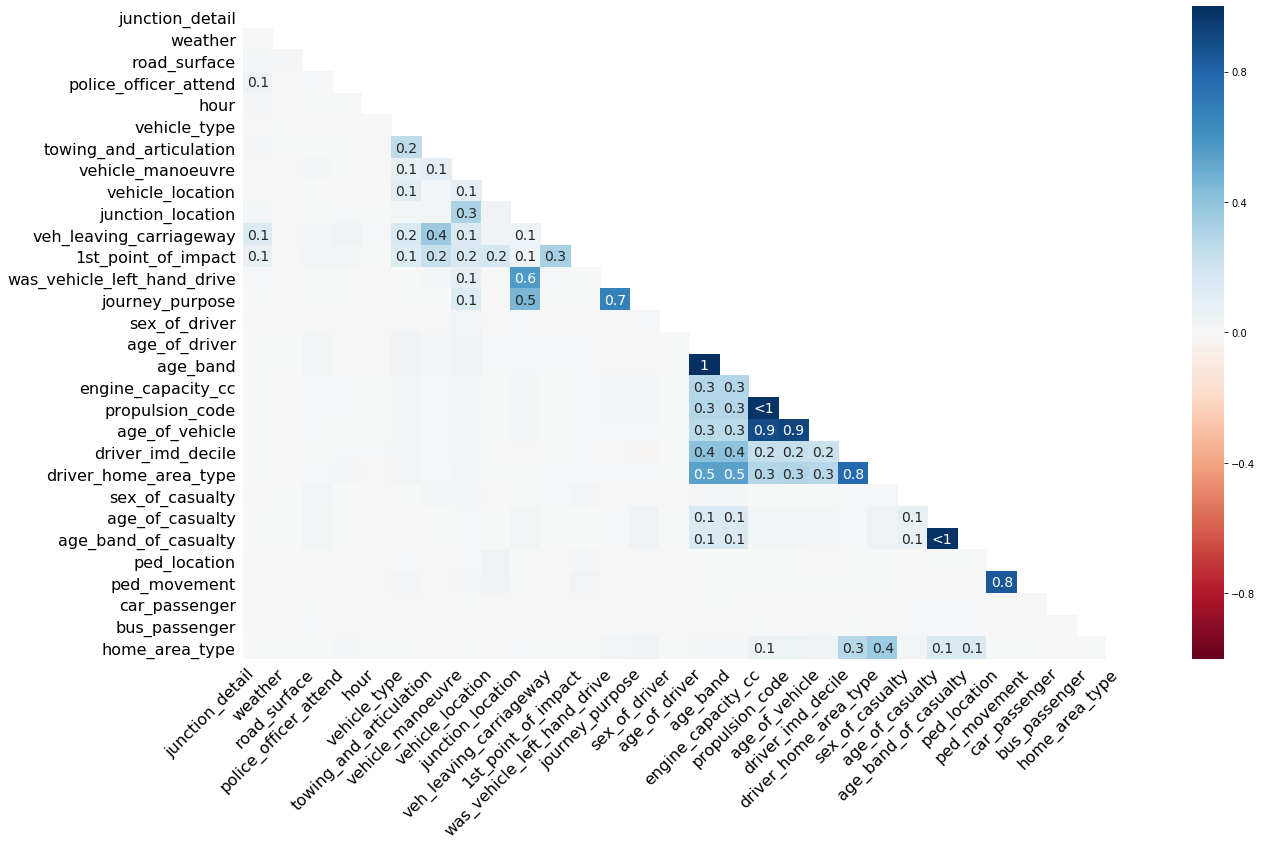

In [7]:
ms.heatmap(uk_accident_merge)

### the graph above shows that the type of missingness for some variables(especially vehicle's data) is (MAR) missing at random which means that there is a relationship /dependency between missingness and observed ones, but not the missing values. 

### Handling missing values

In [23]:
uk_accident_merge.isnull().mean()*100

accident_severity              0.00
number_of_vehicles             0.00
number_of_casualties           0.00
day_of_week                    0.00
local_authority_district       0.00
1st_road_class                 0.00
road_type                      0.00
speed_limit                    0.00
junction_detail                0.00
light_conditions               0.00
weather                        0.01
road_surface                   0.13
urban_rural                    0.00
police_officer_attend          0.02
hour                           0.01
month                          0.00
year                           0.00
vehicle_type                   0.02
towing_and_articulation        0.01
vehicle_manoeuvre              0.05
vehicle_location               0.00
junction_location              0.35
veh_leaving_carriageway        0.00
1st_point_of_impact            0.02
was_vehicle_left_hand_drive    0.77
journey_purpose                1.51
sex_of_driver                  0.00
age_of_driver               

In [11]:
uk_accident_merge.columns[uk_accident_merge.isnull().any()].tolist()

['junction_detail',
 'weather',
 'road_surface',
 'police_officer_attend',
 'hour',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_location',
 'junction_location',
 'veh_leaving_carriageway',
 '1st_point_of_impact',
 'was_vehicle_left_hand_drive',
 'journey_purpose',
 'sex_of_driver',
 'age_of_driver',
 'age_band',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'driver_imd_decile',
 'driver_home_area_type',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'ped_location',
 'ped_movement',
 'car_passenger',
 'bus_passenger',
 'home_area_type']

In [18]:
uk_accident_merge[['age_band','age_of_driver']].sample()

,age_band,age_of_driver
102022,21 - 25,22.00


In [19]:
uk_accident_merge.age_band.value_counts()

26 - 35    333143
36 - 45    294904
46 - 55    210754
21 - 25    201222
16 - 20    189012
56 - 65    128021
66 - 75     60962
Over 75     44448
11 - 15      9169
6 - 10       3229
0 - 5         296
Name: age_band, dtype: int64

In [24]:
uk_accident_merge.age_band_of_casualty.value_counts()

6.00     320432
7.00     277648
4.00     231075
5.00     209150
8.00     197796
9.00     116395
3.00      74133
10.00     63940
11.00     56826
2.00      40454
1.00      21303
Name: age_band_of_casualty, dtype: int64

In [12]:
uk_accident_merge.was_vehicle_left_hand_drive.value_counts()

1.00    1618827
2.00       9094
Name: was_vehicle_left_hand_drive, dtype: int64

In [4]:
uk_accident_merge.was_vehicle_left_hand_drive.replace({1.00:'No',2.00:'Yes'},inplace=True)
uk_accident_merge.was_vehicle_left_hand_drive.value_counts()

No     1618827
Yes       9094
Name: was_vehicle_left_hand_drive, dtype: int64

Drop columns that are out of the scope of interest for this analysis such as ('engine_capacity_cc') also those columns have more than 25% missing values, also 'age_band', 'age_band_of_casualty', cause it has missing values and already there are age's columns  need to be imputing first.

In [5]:
uk_accident_merge.drop(
    ['engine_capacity_cc', 'age_band', 'age_band_of_casualty'],axis=1,inplace=True)

In [41]:
#replace with Missing
uk_accident_merge.propulsion_code.replace(np.nan,'Missing',inplace=True)

In [42]:
uk_accident_merge.propulsion_code.value_counts()

1.0        844427
2.0        397612
Missing    393257
8.0          2855
7.0          1325
6.0           697
3.0           293
5.0            93
12.0           20
10.0            8
9.0             6
4.0             4
Name: propulsion_code, dtype: int64

In [6]:
# replace the missing value with the mode in columns with a low percentage of missingness.
cat_cols_with_low_missing=['junction_detail',
 'weather',
 'road_surface',
 'police_officer_attend','vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_location',
 'junction_location',
 'veh_leaving_carriageway',
 '1st_point_of_impact',
 'journey_purpose',
 'sex_of_driver','car_passenger','sex_of_casualty','was_vehicle_left_hand_drive',
                           'ped_location','ped_movement','bus_passenger'
                          ]
for col in cat_cols_with_low_missing:
    
    uk_accident_merge[col] = uk_accident_merge[col].fillna(uk_accident_merge[col].mode()[0])


In [7]:
uk_accident_merge[cat_cols_with_low_missing].isna().sum()

junction_detail                0
weather                        0
road_surface                   0
police_officer_attend          0
vehicle_type                   0
towing_and_articulation        0
vehicle_manoeuvre              0
vehicle_location               0
junction_location              0
veh_leaving_carriageway        0
1st_point_of_impact            0
journey_purpose                0
sex_of_driver                  0
car_passenger                  0
sex_of_casualty                0
was_vehicle_left_hand_drive    0
ped_location                   0
ped_movement                   0
bus_passenger                  0
dtype: int64

In [8]:
uk_accident_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 41 columns):
accident_severity              1640597 non-null object
number_of_vehicles             1640597 non-null int64
number_of_casualties           1640597 non-null int64
day_of_week                    1640597 non-null object
local_authority_district       1640597 non-null object
1st_road_class                 1640597 non-null object
road_type                      1640597 non-null object
speed_limit                    1640597 non-null int64
junction_detail                1640597 non-null object
light_conditions               1640597 non-null object
weather                        1640597 non-null object
road_surface                   1640597 non-null object
urban_rural                    1640597 non-null object
police_officer_attend          1640597 non-null object
hour                           1640464 non-null float64
month                          1640597 non-null object
year     

In [25]:
uk_accident_merge.hour.fillna(uk_accident_merge.hour.median(),inplace=True)

In [10]:
uk_accident_merge.hour.isna().sum()

0

In [11]:
uk_accident_merge.rename(columns={'home_area_type':'casualty_home_area_type'},inplace=True)

<a id='imp'></a>
## Imputing missing values with machine learning

#### Machine Learning imputation for important features:('age_of_driver','age_of_casualty,'age_of_vehicle','casualty_home_area_type','driver_home_area_type'') 

In [12]:
def reduce_memory_usage(data):
    for col in data.columns:
        
        if data[col].dtype == 'int64':
            data[col]=data[col].astype('int16')
        elif data[col].dtype == 'float64':
            data[col]=data[col].astype('float16')
    return data.info()  

In [13]:
reduce_memory_usage(uk_accident_merge)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 41 columns):
accident_severity              1640597 non-null object
number_of_vehicles             1640597 non-null int16
number_of_casualties           1640597 non-null int16
day_of_week                    1640597 non-null object
local_authority_district       1640597 non-null object
1st_road_class                 1640597 non-null object
road_type                      1640597 non-null object
speed_limit                    1640597 non-null int16
junction_detail                1640597 non-null object
light_conditions               1640597 non-null object
weather                        1640597 non-null object
road_surface                   1640597 non-null object
urban_rural                    1640597 non-null object
police_officer_attend          1640597 non-null object
hour                           1640597 non-null float16
month                          1640597 non-null object
year     

In [14]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [15]:
uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 3 columns):
age_of_driver      1475160 non-null float16
age_of_vehicle     1191545 non-null float16
age_of_casualty    1608560 non-null float16
dtypes: float16(3)
memory usage: 9.4 MB


In [16]:
uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']].describe()

,age_of_driver,age_of_vehicle,age_of_casualty
count,"1,475,160.00","1,191,545.00","1,608,560.00"
mean,nan,nan,nan
std,0.00,0.00,0.00
min,1.00,1.00,1.00
25%,25.00,4.00,21.00
50%,36.00,7.00,32.00
75%,49.00,10.00,47.00
max,100.00,110.00,103.00


In [17]:
import time
t1=time.time()

imp_mean = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
imp_mean.fit(uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']])
uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']]=np.round(imp_mean.transform(uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']]))
time.time() - t1

1229.1753668785095

In [22]:
round(1229.1753668785095 /60) 

20

In [23]:
uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']].describe()

,age_of_driver,age_of_vehicle,age_of_casualty
count,"1,640,597.00","1,640,597.00","1,640,597.00"
mean,38.80,7.47,35.81
std,16.75,3.90,18.20
min,1.00,1.00,1.00
25%,25.00,5.00,21.00
50%,36.00,7.00,33.00
75%,49.00,9.00,47.00
max,100.00,110.00,103.00


### After the imputation of missing values, the distribution of the data isn't changed and that is the purpose of using machine learning!.

In [24]:
uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']].isna().sum()

age_of_driver      0
age_of_vehicle     0
age_of_casualty    0
dtype: int64

In [26]:
#save to csv file
# uk_accident_merge.to_csv('data\\uk_accidents_2.csv',index=False)

In [116]:
# uk_accident_merge_sample=uk_accident_merge.sample(10000)

In [28]:
uk_accident_merge.columns[uk_accident_merge.isnull().any()].tolist()

['driver_imd_decile', 'driver_home_area_type', 'casualty_home_area_type']

### imputing categorical variables
'casualty_home_area_type','driver_home_area_type','driver_imd_decile'

In [76]:
 uk_accident_merge=pd.read_csv('data\\uk_accidents_2.csv')

In [77]:
#display value_counts for cat_cols
cat_cols = ['casualty_home_area_type','driver_home_area_type','driver_imd_decile']
for col in cat_cols:
    print(col)
    display(uk_accident_merge[col].value_counts())
    print('-'*60)

casualty_home_area_type


Urban area    1125417
Rural          159569
Small town     129563
Name: casualty_home_area_type, dtype: int64

------------------------------------------------------------
driver_home_area_type


1.00    1036001
3.00     162917
2.00     124158
Name: driver_home_area_type, dtype: int64

------------------------------------------------------------
driver_imd_decile


2.00     128493
3.00     127507
4.00     124301
1.00     123064
5.00     121322
6.00     119435
7.00     114248
8.00     111296
9.00     106900
10.00     98302
Name: driver_imd_decile, dtype: int64

------------------------------------------------------------


In [78]:
uk_accident_merge.driver_imd_decile.replace({1:'Most deprived 10%',
                                            2:'More deprived 10-20%',
                                            3: 'More deprived 20-30%',
                                            4: 'More deprived 30-40%',
                                            5: 'More deprived 40-50%',
                                            6: 'Less deprived 40-50%',
                                            7: 'Less deprived 30-40%',
                                            8: 'Less deprived 20-30%',
                                            9: 'Less deprived 10-20%',
                                            10:'Least deprived 10%'},inplace=True)
uk_accident_merge.replace({'driver_home_area_type':{1:'Urban area',2:'Small town',3:'Rural'}},inplace=True)

In [101]:
uk_accident_merge.driver_imd_decile.replace(np.nan,'Missing',inplace=True)

In [79]:
cat_cols = ['casualty_home_area_type','driver_home_area_type']
cat_value_counts_before_imputing=[]
for col in cat_cols:
    cat_value_counts_before_imputing.append(uk_accident_merge[col].value_counts())
    print(col)
    display(uk_accident_merge[col].value_counts())
    print('-'*60)

casualty_home_area_type


Urban area    1125417
Rural          159569
Small town     129563
Name: casualty_home_area_type, dtype: int64

------------------------------------------------------------
driver_home_area_type


Urban area    1036001
Rural          162917
Small town     124158
Name: driver_home_area_type, dtype: int64

------------------------------------------------------------


In [80]:
uk_accident_merge[cat_cols].describe()

,casualty_home_area_type,driver_home_area_type
count,1414549,1323076
unique,3,3
top,Urban area,Urban area
freq,1125417,1036001


In [81]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder

In [82]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesClassifier())
# create a list of categorical columns to iterate over
cat_cols = ['casualty_home_area_type','driver_home_area_type']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(uk_accident_merge[columns])

In [83]:
uk_accident_merge[cat_cols].describe()

,casualty_home_area_type,driver_home_area_type
count,"1,414,549.00","1,323,076.00"
unique,3.00,3.00
top,2.00,2.00
freq,"1,125,417.00","1,036,001.00"


In [84]:
imputer = IterativeImputer(ExtraTreesClassifier(),random_state=0)
uk_accident_merge[cat_cols] = np.round(imputer.fit_transform(uk_accident_merge[cat_cols]))

In [85]:
uk_accident_merge[cat_cols].isna().sum()

casualty_home_area_type    0
driver_home_area_type      0
dtype: int64

In [86]:
for col in cat_cols:
    print(col)
    display(uk_accident_merge[col].value_counts())
    print('-'*60)

casualty_home_area_type


2.00    1334408
0.00     168806
1.00     137383
Name: casualty_home_area_type, dtype: int64

------------------------------------------------------------
driver_home_area_type


2.00    1323477
0.00     178651
1.00     138469
Name: driver_home_area_type, dtype: int64

------------------------------------------------------------


In [87]:
# Replace encoded labels with original
uk_accident_merge.replace({'casualty_home_area_type':
    {0.00:'Rural',1.00:'Small Town',2.00:'Urban Area'},\
                           'driver_home_area_type':{0.00:'Rural',1.00:'Small Town',2.00:'Urban Area'}},inplace=True)

In [98]:
print(f'Categorical varibles before imputing missing values:\n\n{cat_value_counts_before_imputing}')
for col in cat_cols:
    print(f'\n\nCategorical varibles after imputing missing values\n\n\n{col}\n\n{uk_accident_merge[col].value_counts()}')

Categorical varibles before imputing missing values:

[Urban area    1125417
Rural          159569
Small town     129563
Name: casualty_home_area_type, dtype: int64, Urban area    1036001
Rural          162917
Small town     124158
Name: driver_home_area_type, dtype: int64]


Categorical varibles after imputing missing values


casualty_home_area_type

Urban Area    1334408
Rural          168806
Small Town     137383
Name: casualty_home_area_type, dtype: int64


Categorical varibles after imputing missing values


driver_home_area_type

Urban Area    1323477
Rural          178651
Small Town     138469
Name: driver_home_area_type, dtype: int64


In [103]:
uk_accident_merge.isna().sum().sum()

0

In [43]:
uk_accident_merge.columns

Index(['accident_index', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'local_authority_district',
       '1st_road_class', 'road_type', 'speed_limit', 'junction_detail',
       'light_conditions', 'weather', 'road_surface', 'urban_rural',
       'police_officer_attend', 'hour', 'month', 'year', 'vehicle_reference_x',
       'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location', 'junction_location', 'veh_leaving_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive', 'journey_purpose',
       'sex_of_driver', 'age_of_driver', 'age_band', 'engine_capacity_cc',
       'propulsion_code', 'age_of_vehicle', 'driver_imd_decile',
       'driver_home_area_type', 'vehicle_reference_y', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'ped_location',
       'ped_movement', 'car_passenger', 'bus_passenger', 'casua

In [44]:
# uk_accidents['vehicle_propulsion_code']=uk_accident_merge['propulsion_code']

In [104]:
# uk_accident_merge.to_csv('data\\uk_accidents_2.csv',index=False)

In [45]:
# uk_accidents.to_csv('data\\uk_accidents_2.csv',index=False)

<a id='eda'></a>
# Explatory Data Analysis

<a id='uni'></a>
## Univariate Exploration


In [2]:
uk_accidents_2=pd.read_csv('data\\uk_accidents_2.csv')

In [5]:
uk_accidents.head(2)

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_of_vehicle,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,casualty_home_area_type
0,Serious,1,1,Tuesday,Kensington and Chelsea,A,Single carriageway,30,Not at junction or within 20 metres,Daylight,Raining no high winds,Wet or damp,Urban,Yes,17.00,April,2005,Car,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,No,Other/Not known (2005-10),Female,74.00,6.00,Less deprived 30-40%,Urban Area,Pedestrian,Male,37.00,Serious,Crossing on pedestrian crossing facility,Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban Area
1,Slight,1,1,Wednesday,Kensington and Chelsea,B,Dual carriageway,30,Crossroads,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,17.00,May,2005,Bus or coach (17 or more pass seats),No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,Did not leave carriageway,Nearside,No,Journey as part of work,Male,42.00,3.00,Missing,Urban Area,Passenger,Male,37.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Urban Area


Invistigate the distribution of interested feature 'accident severity'

In [33]:
# order values 
accident_severity_classes = ['Slight','Serious','Fatal']

a_s_classes = pd.api.types.CategoricalDtype(ordered=True, categories=accident_severity_classes)

uk_accidents['accident_severity'] = uk_accidents['accident_severity'].astype(a_s_classes)

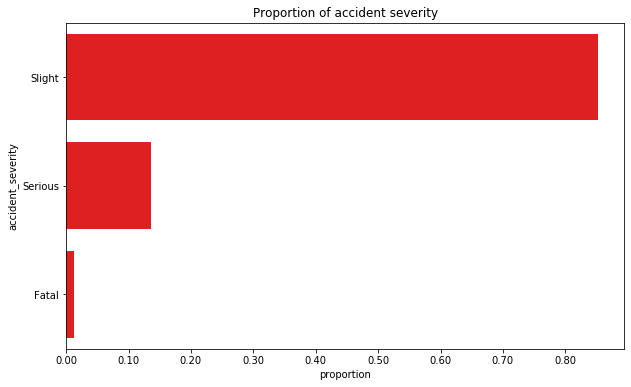

In [9]:
severity_counts=uk_accidents.accident_severity.value_counts()
n_severity = uk_accidents.accident_severity.value_counts().sum()

# Return the highest frequency in the `type` column
max_severity_count = severity_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_severity_count / n_severity
tick_prop=np.arange(0,max_prop,.1)
tick_names=['{:0.2f}'.format(v) for v in tick_prop]

plt.figure(figsize=[10,6])
sb.countplot(y=uk_accidents.accident_severity,color='red')
plt.xticks(tick_prop * n_severity,tick_names)
plt.title('Proportion of accident severity')
plt.xlabel('proportion');

###  It's clear that slight accidents had the greatest proportion in severity type in contrast serious and fatal had low proportions..

In [3]:
uk_accidents_2.rename(columns={'1st_road_class':'road_class'},inplace=True)
uk_accidents_2.replace({
    'road_class':{'A':'A: (major roads)','A(M)':'A(M): (main roads with motorway regulation)',
                 'B':'B: minor roads','C':'C: minor roads','Unclassified':'Unclassified: minor roads'}},inplace=True)

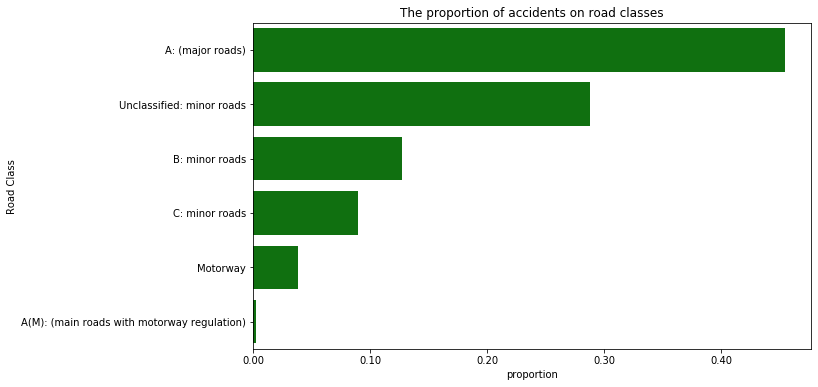

In [5]:
type_counts=uk_accidents_2.road_class.value_counts()
n_road = uk_accidents_2.road_class.value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_road
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.figure(figsize=[10,6])
sb.countplot(y=uk_accidents_2.road_class,color='green',order=uk_accidents_2.road_class.value_counts().index)
plt.xticks(tick_props * n_road, tick_names)
plt.xlabel('proportion')
plt.ylabel('Road Class')
plt.title('The proportion of accidents on road classes');

### We can see from the bar chart that most accidents happened on major roads which have high traffic flows.

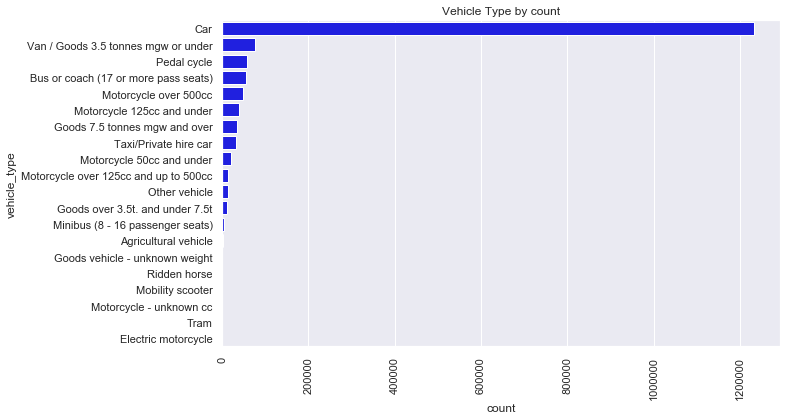

In [9]:
plt.figure(figsize=(10,6))
sb.countplot(y=uk_accidents.vehicle_type,order=uk_accidents.vehicle_type.value_counts().index,color='blue')
plt.title('Vehicle Type by count')
plt.xticks(rotation=90);

### The graph above shows that the most  frequent vehicle types in accidents were:
### Cars, van/goods 3.5 tonnes mgw or under and pedal cycles. 

#### However, there is some values in-vehicle type column that needs to be combined together for more information.

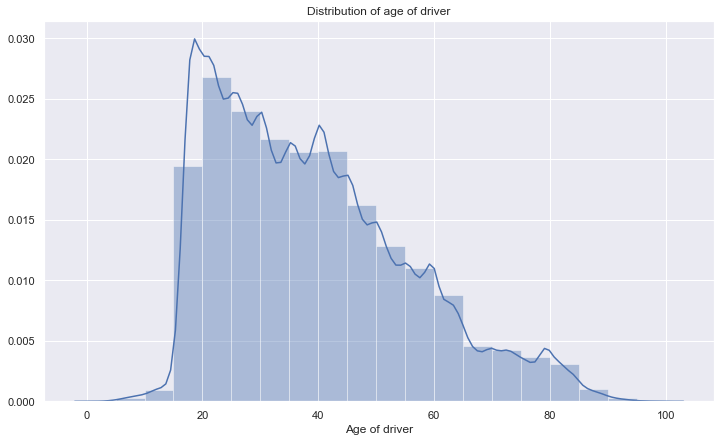

In [26]:
plt.figure(figsize=[12,7])
sb.set()
sb.distplot(uk_accidents_2.age_of_driver,bins=np.arange(0,uk_accidents_2.age_of_driver.max()+5,5))
plt.title('Distribution of age of driver')
plt.xlabel('Age of driver');

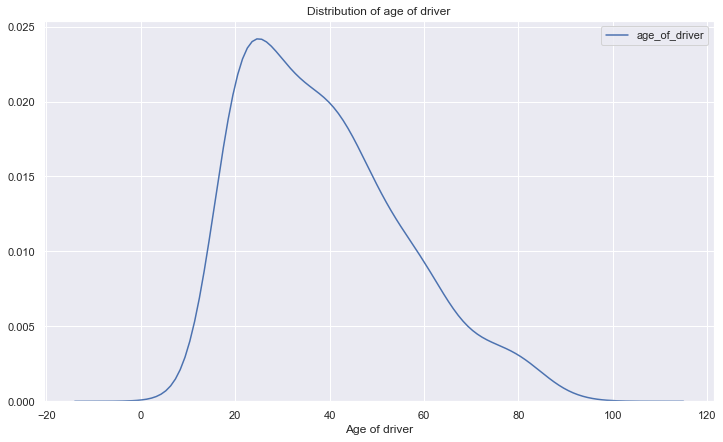

In [30]:
plt.figure(figsize=[12,7])
sb.set()
sb.kdeplot(uk_accidents_2.age_of_driver, bw=5)
plt.title('Distribution of age of driver')
plt.xlabel('Age of driver');

### The graph highlights that the most frequent ages of drivers, who involved in accidents, clumped up between (15 - 35). and the histogram is right-skewed with some outliers above 80.

##### According to the graph above, there were some points under 17.  we should take a deeper look at them to identify if they need to be filtered out.

In [55]:
low_age_outliers=uk_accidents[uk_accidents.age_of_driver <17]
low_age_outliers.shape[0]/uk_accidents.shape[0]*100 #prportion of low_outliers in age

1.648850997533215

In [51]:
low_age_outliers.vehicle_type.value_counts() #Pedal cycle is most frequent vehicle type under 17 and that makes sense... 

Pedal cycle                              12690
Motorcycle 50cc and under                 7927
Car                                       3892
Motorcycle 125cc and under                1259
Other vehicle                              356
Motorcycle over 125cc and up to 500cc      207
Van / Goods 3.5 tonnes mgw or under        193
Taxi/Private hire car                      129
Bus or coach (17 or more pass seats)       110
Goods 7.5 tonnes mgw and over               70
Motorcycle over 500cc                       70
Agricultural vehicle                        51
Goods over 3.5t. and under 7.5t             41
Ridden horse                                28
Minibus (8 - 16 passenger seats)            14
Motorcycle - unknown cc                     11
Electric motorcycle                          1
Tram                                         1
Goods vehicle - unknown weight               1
Name: vehicle_type, dtype: int64

In [52]:
low_age_outliers.age_of_driver.value_counts()

16.00    14357
15.00     2518
14.00     2013
13.00     1756
12.00     1622
11.00     1260
10.00      986
9.00       767
8.00       651
7.00       481
6.00       344
5.00       202
4.00        65
3.00        19
2.00         5
1.00         5
Name: age_of_driver, dtype: int64

In [53]:
low_age_outliers.casualty_type.value_counts()

Cyclist                                                      12888
Motorcycle 50cc and under rider or passenger                  7556
Car occupant                                                  2491
Pedestrian                                                    1915
Motorcycle 125cc and under rider or passenger                 1397
Other vehicle occupant                                         259
Motorcycle over 125cc and up to 500cc rider or  passenger      218
Motorcycle over 500cc rider or passenger                       102
Bus or coach occupant (17 or more pass seats)                   51
Taxi/Private hire car occupant                                  49
Van / Goods vehicle (3.5 tonnes mgw or under) occupant          37
Horse rider                                                     37
Goods vehicle (over 3.5t. and under 7.5t.) occupant             15
Agricultural vehicle occupant                                   15
Motorcycle - unknown cc rider or passenger                    

In [54]:
low_age_outliers[low_age_outliers.age_of_driver <5]

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_of_vehicle,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,casualty_home_area_type,vehicle_propulsion_code
9668,Serious,2,1,Tuesday,Tower Hamlets,A: (major roads),Roundabout,30,Roundabout,Daylight,Fine no high winds,Dry,Urban,Yes,8.00,July,2005,Pedal cycle,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junction approach,Did not leave carriageway,Did not impact,No,Other/Not known (2005-10),Male,4.00,10.00,More deprived 40-50%,Urban Area,Driver or rider,Male,4.00,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Cyclist,Urban Area,Missing
24515,Slight,2,1,Monday,Enfield,A: (major roads),Single carriageway,30,T or staggered junction,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,18.00,December,2005,Pedal cycle,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Mid Junction - on roundabout or on main road,Did not leave carriageway,Offside,No,Other/Not known (2005-10),Not known,1.00,11.00,Missing,Urban Area,Passenger,Male,17.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Cyclist,Urban Area,Missing
30762,Serious,2,2,Saturday,Chorley,Unclassified: minor roads,Single carriageway,30,Crossroads,Daylight,Fine no high winds,Wet or damp,Rural,Yes,16.00,January,2005,Pedal cycle,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Entering main road,Did not leave carriageway,Front,No,Other/Not known (2005-10),Male,4.00,10.00,More deprived 30-40%,Small Town,Driver or rider,Male,4.00,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Cyclist,Small Town,Missing
45174,Slight,2,1,Wednesday,Wigan,Unclassified: minor roads,Single carriageway,30,T or staggered junction,Darkness - lights lit,Fine no high winds,Dry,Rural,Yes,19.00,March,2005,Pedal cycle,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Mid Junction - on roundabout or on main road,Did not leave carriageway,Front,No,Other/Not known (2005-10),Male,4.00,10.00,Less deprived 40-50%,Urban Area,Driver or rider,Male,4.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Cyclist,Urban Area,Missing
45832,Slight,2,1,Saturday,Bury,Unclassified: minor roads,Single carriageway,30,T or staggered junction,Daylight,Fine no high winds,Dry,Urban,Yes,12.00,November,2005,Pedal cycle,No tow/articulation,Moving off,On main c'way - not in restricted lane,Cleared junction or waiting/parked at junction exit,Did not leave carriageway,Offside,No,Other/Not known (2005-10),Male,4.00,10.00,More deprived 10-20%,Urban Area,Driver or rider,Male,4.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Cyclist,Urban Area,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549092,Slight,1,1,Sunday,Sheffield,Unclassified: minor roads,Single carriageway,30,Not at junction or within 20 metres,Daylight,Unknown,Dry,Urban,Yes,16.00,June,2014,Other vehicle,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Offside,Front,No,Not known,Male,3.00,11.00,Missing,Urban Area,Driver or rider,Male,3.00,Slight,Not a Pedestrian,Not a Pedestrian,Not

In [89]:
low_age_outliers[(low_age_outliers.age_of_driver <15)&(low_age_outliers.vehicle_type != 'Pedal cycle')|\
                 (low_age_outliers.age_of_driver < 5)].shape

(829, 42)

#### since, the range of minimum legal ege of driving is between 15 'eight months'- 17,we are assuming that under 15 and driving a vehicle -except Pedal cycle-is an outlier also not logic that anyone under 5 can drive any type of vehicle, and that was probably wrong informatin with data input. 

In [56]:
high_outlier=uk_accidents[uk_accidents.age_of_driver > 80]
high_outlier.shape[0]/uk_accidents.shape[0]*100 #prportion of ages above 80

1.7690511441871466

In [57]:
high_outlier.sample(5)

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_of_vehicle,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,casualty_home_area_type,vehicle_propulsion_code
1497696,Slight,1,1,Saturday,Camden,A: (major roads),Single carriageway,30,Crossroads,Darkness - lights lit,Fine no high winds,Dry,Urban,No,5.00,October,2014,Taxi/Private hire car,No tow/articulation,Moving off,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junction approach,Did not leave carriageway,Offside,No,Not known,Not known,82.00,8.00,Missing,Urban Area,Pedestrian,Male,32.00,Slight,"In carriageway, not crossing",Unknown or other,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban Area,Missing
1366725,Slight,2,1,Saturday,Southwark,A: (major roads),Single carriageway,30,T or staggered junction,Daylight,Fine no high winds,Dry,Urban,Yes,13.00,June,2013,Car,No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Cleared junction or waiting/parked at junction exit,Did not leave carriageway,Did not impact,No,Not known,Not known,82.00,8.00,Missing,Urban Area,Driver or rider,Male,32.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Cyclist,Urban Area,Missing
1139848,Slight,1,1,Thursday,Leicester,Unclassified: minor roads,Single carriageway,30,T or staggered junction,Daylight,Other,Wet or damp,Urban,Yes,11.00,October,2011,Car,No tow/articulation,Turning right,On main c'way - not in restricted lane,Leaving main road,Nearside and rebounded,Front,No,Not known,Female,85.00,6.00,More deprived 40-50%,Urban Area,Driver or rider,Female,85.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Urban Area,1.00
1093918,Slight,3,2,Tuesday,Bolton,B: minor roads,Single carriageway,30,T or staggered junction,Daylight,Fine no high winds,Dry,Urban,Yes,13.00,March,2011,Car,No tow/articulation,Overtaking static vehicle - offside,On main c'way - not in restricted lane,Approaching junction or waiting/parked at junction approach,Did not leave carriageway,Front,No,Not known,Male,84.00,3.00,More deprived 40-50%,Urban Area,Driver or rider,Female,58.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Small Town,1.00
28892,Slight,1,1,Wednesday,Blackpool,Unclassified: minor roads,Single carriageway,30,Not at junction or within 20 metres,Daylight,Fine no high winds,Dry,Urban,Yes,13.00,April,2005,Car,No tow/articulation,Overtaking static vehicle - offside,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,No,Other/Not known (2005-10),Male,88.00,3.00,Less deprived 10-20%,Small Town,Pedestrian,Female,12.00,Slight,"In carriageway, crossing elsewhere",Crossing from nearside - masked by parked or stationary vehicle,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban Area,1.00


In [58]:
high_outlier['vehicle_type'].value_counts()

Car                                      26517
Van / Goods 3.5 tonnes mgw or under        583
Other vehicle                              502
Pedal cycle                                247
Goods 7.5 tonnes mgw and over              246
Taxi/Private hire car                      218
Bus or coach (17 or more pass seats)       207
Goods over 3.5t. and under 7.5t            118
Motorcycle 125cc and under                  85
Motorcycle over 125cc and up to 500cc       73
Motorcycle over 500cc                       58
Mobility scooter                            55
Motorcycle 50cc and under                   55
Agricultural vehicle                        27
Minibus (8 - 16 passenger seats)            20
Goods vehicle - unknown weight               9
Motorcycle - unknown cc                      1
Electric motorcycle                          1
Tram                                         1
Name: vehicle_type, dtype: int64

In [59]:
high_outlier['casualty_type'].value_counts()

Car occupant                                                 18525
Pedestrian                                                    4838
Cyclist                                                       2830
Motorcycle over 500cc rider or passenger                       737
Motorcycle 125cc and under rider or passenger                  449
Other vehicle occupant                                         329
Bus or coach occupant (17 or more pass seats)                  244
Motorcycle 50cc and under rider or passenger                   242
Van / Goods vehicle (3.5 tonnes mgw or under) occupant         235
Motorcycle over 125cc and up to 500cc rider or  passenger      217
Taxi/Private hire car occupant                                 171
Goods vehicle (7.5 tonnes mgw and over) occupant                59
Mobility scooter rider                                          46
Goods vehicle (over 3.5t. and under 7.5t.) occupant             40
Horse rider                                                   

In [60]:
#It doesn't make sense that there are a driver can drive after 90 years old!.
high_outlier['age_of_driver'].value_counts()

82.00     6612
81.00     5004
84.00     4268
83.00     2979
85.00     2385
86.00     1911
87.00     1551
88.00     1228
89.00      970
90.00      694
91.00      493
92.00      347
93.00      220
94.00      164
95.00       86
96.00       44
98.00       31
97.00       27
99.00        8
100.00       1
Name: age_of_driver, dtype: int64

In [41]:
#extract outliers
outliers=uk_accidents[(uk_accidents.age_of_driver <15)&(uk_accidents.vehicle_type != 'Pedal cycle')|\
                 (uk_accidents.age_of_driver < 5)|(uk_accidents.age_of_driver>90)]
outliers.shape

(2250, 42)

In [83]:
# uk_accidents_copy=uk_accidents.copy()

In [42]:
uk_accidents.drop(outliers.index,inplace=True)

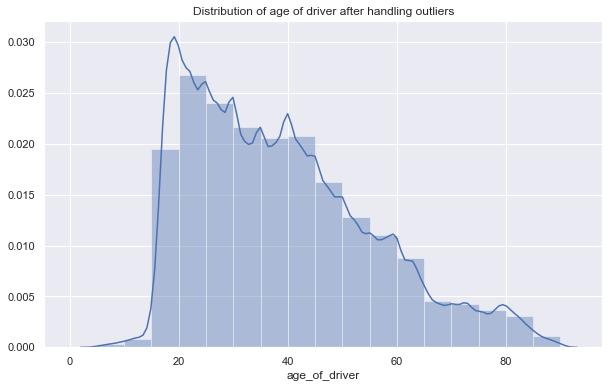

In [57]:
plt.figure(figsize=[10,6])
sb.set()
plt.title('Distribution of age of driver after handling outliers')
# plt.xlim((7.0,75))
sb.distplot(uk_accidents.age_of_driver,bins=np.arange(0,uk_accidents.age_of_driver.max()+5,5));

In [46]:
# uk_accident_merge=pd.read_csv('data\\uk_accidents.csv')

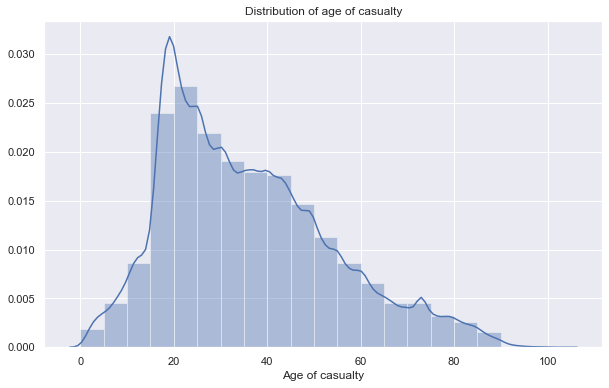

In [15]:
plt.figure(figsize=[10,6])
sb.set()
sb.distplot(uk_accidents.age_of_casualty,bins=np.arange(0,uk_accidents.age_of_driver.max()+5,5))
plt.title('Distribution of age of casualty')
plt.xlabel('Age of casualty');

### The distribution shows that most younger ages were more victimized by accidents, especially range between 20-35.

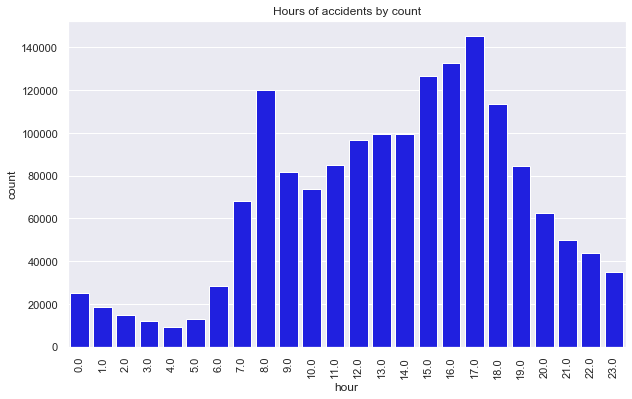

In [14]:
plt.figure(figsize=[10,6])
sb.countplot(uk_accidents.hour,color='blue')
plt.title("Hours of accidents by count")
plt.xticks(rotation=90);

### The distribution of hours of accidents is  bimodal which means the data had more than one peak. And we can see that most accidents mostly happened between 8 am to 5 pm. 

####  We need to add some variable depends on the hour's column to clarify when exactly were accidents happen?

In [2]:
# uk_accidents=pd.read_csv('data\\uk_accidents_3.csv')

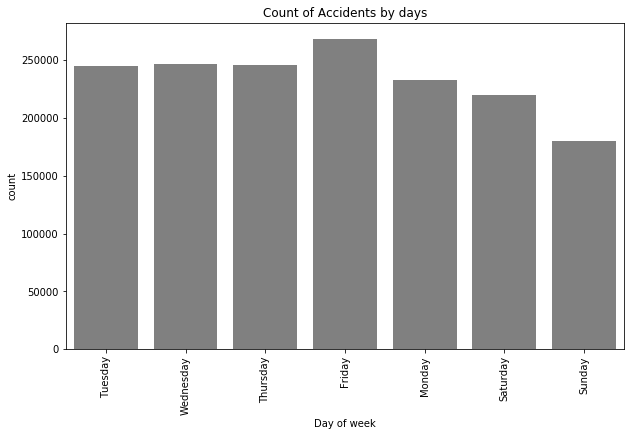

In [21]:
plt.figure(figsize=(10,6))
sb.countplot(x=uk_accidents.day_of_week,color='grey')
plt.title("Count of Accidents by days")
plt.xlabel('Day of week')
plt.xticks(rotation=90);

### According to the bar graph working days (from monday to friday) had the highest count of accidents in contrast weekends had slightly less count of accidents.

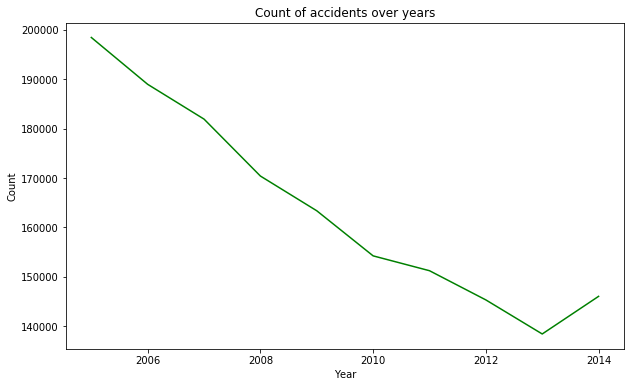

In [20]:
plt.figure(figsize=(10,6))
sb.lineplot(x=uk_accidents.year.value_counts().index,y=uk_accidents.year.value_counts().values ,color='green')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of accidents over years');

### The line graph shows that the number of accidents from 2005 to 2013 declined, however, it slightly increased by 2014 than 2013.

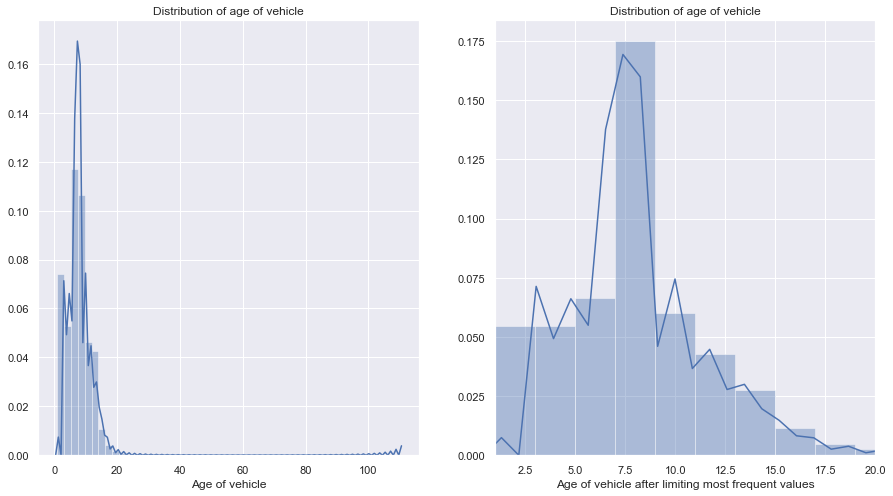

In [3]:
plt.figure(figsize=[15,8])
sb.set()
plt.subplot(1, 2, 1)
sb.distplot(uk_accidents.age_of_vehicle)
plt.title('Distribution of age of vehicle')
plt.xlabel('Age of vehicle')
plt.subplot(1, 2, 2)
sb.distplot(uk_accidents.age_of_vehicle,bins=np.arange(1,20+2,2))
plt.xlim((uk_accidents.age_of_vehicle.min(),20))
plt.title('Distribution of age of vehicle')
plt.xlabel('Age of vehicle after limiting most frequent values');

### Most frequent ages of vehicles clumped up between 6 and 9. And above 20 to 110 there was a long tail of oldest vehicles!. 

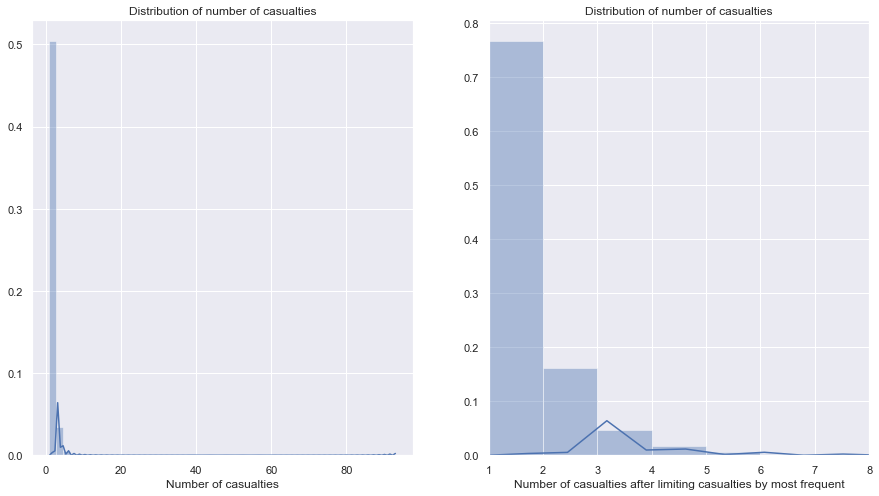

In [28]:
plt.figure(figsize=[15,8])
sb.set()
plt.subplot(1, 2, 1)
sb.distplot(uk_accidents.number_of_casualties)
plt.title('Distribution of number of casualties')
plt.xlabel('Number of casualties')
plt.subplot(1, 2, 2)
sb.distplot(uk_accidents.number_of_casualties,bins=np.arange(1,7+1,1))
plt.xlim((uk_accidents.age_of_vehicle.min(),8))
plt.title('Distribution of number of casualties')
plt.xlabel('Number of casualties after limiting casualties by most frequent');

### We can see from the chart that the most common frequent number of casualties was between 1 and 6, however there were dramatically large numbers of casualties were less frequent..

In [3]:
uk_accidents.loc[uk_accidents.weather == 'Unknown','weather'] = 'Other'

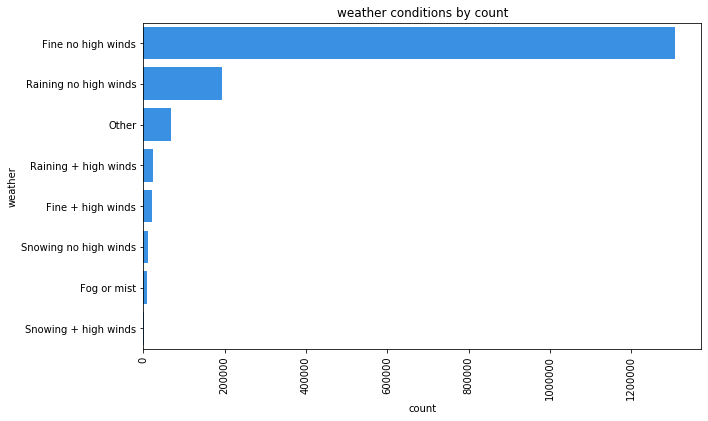

In [4]:
plt.figure(figsize=(10,6))
sb.countplot(y=uk_accidents.weather,color='dodgerblue',order=uk_accidents.weather.value_counts().index)
plt.title('weather conditions by count')
plt.xticks(rotation=90);

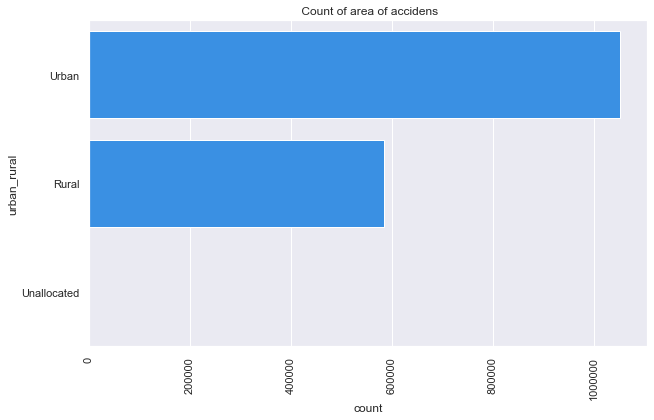

In [27]:
plt.figure(figsize=(10,6))
sb.countplot(y=uk_accidents.urban_rural,color='dodgerblue')
plt.title(' Count of area of accidens')
plt.xticks(rotation=90);

In [16]:
#Types of propulsion system... 
uk_accidents.vehicle_propulsion_code.value_counts()

1.0        843135
2.0        397480
Missing    392437
8.0          2851
7.0          1325
6.0           697
3.0           291
5.0            93
12.0           20
10.0            8
9.0             6
4.0             4
Name: vehicle_propulsion_code, dtype: int64

In [53]:
# map values with their strings
# code	label
# 1	Petrol
# 2	Heavy oil
# 3	Electric
# 4	Steam
# 5	Gas
# 6	Petrol/Gas (LPG)
# 7	Gas/Bi-fuel
# 8	Hybrid electric
# 9	Gas Diesel
# 10	New fuel technology
# 11	Fuel cells
# 12	Electric diesel
uk_accidents.vehicle_propulsion_code.replace({'1.0':'Petrol','2.0':'Heavy oil','3.0':'Electric','4.0':'Steam','5.0':'Gas','6.0':'Petrol/Gas (LPG)',
                               '7.0':'Gas/Bi-fuel','8.0':'Hybrid electric','9.0':'Gas Diesel','10.0':'New fuel technology'
                               ,'12.0':'Electric diesel','Nan':'Missing'},inplace=True)

In [52]:
# uk_accidents.vehicle_propulsion_code.value_counts()
# plt.figure(figsize=(10,6))
# sb.countplot(y=uk_accidents.vehicle_propulsion_code,order=uk_accidents.vehicle_propulsion_code.value_counts().index,color='blue')
# plt.title('Vehicle propulsion code by count')
# plt.xticks(rotation=90);

In [40]:
# uk_accidents.to_csv('data\\uk_accidents_3.csv',index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Accident severity: slight accidents had the greatest proportion in severity type in contrast serious and fatal had low proportions..

* Road class: most accidents happened on major roads which have high traffic flows.

* Vehicle type: that the most frequent vehicle types in accidents were:
  Cars, van/goods 3.5 tonnes mgw or under and pedal cycles.
  
* Age of driver: the most frequent ages of drivers, who involved in accidents, clumped up between (20 - 40). and the histogram is right-skewed with some outliers above 80.

* Hours: most accidents happened between 8 am to 5 pm .

* Age of casualty: The distribution shows that most younger ages were more victimized by accidents, especially range between 20-35.

* Day of week:  working days (from monday to friday) had the highest count of accidents in contrast weekends had slightly less count of accidents.

* Year: number of accidents from 2005 to 2013 declined, however, it slightly increased by 2014 than 2013.

* Age of vehicle: Most frequent ages of vehicles clumped up between 6 and 9. And above 20 to 110 there was a long tail of oldest vehicles!.

* Number of casualties: most common frequent number of casualties was between 1 and 6, however there were dramatically large numbers of casualties were less frequent...

No transformation was needed likely due to the straightforwardness of the data 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* Age of driver:
    there were some points under 17 and above 90 seemed outliers for us, since the range of minimum legal ege of driving is between 15 'eight months'- 17,we have assumed that under 15 and driving a vehicle -except Pedal cycle-is an outlier also not logic that anyone under 5 can drive any type of vehicle on public roads, and that was probably wrong informatin with data input, so we filtered these rows out.
    
* Vehicle type: there were some values in-vehicle type column that will need to be combined together in bivariate analysis for more information.

* Hour: In bivariate section, we will need to add some variable depends on the hour's column to clarify when exactly were accidents happen?


<a id='bi'></a>
## Bivariate Exploration

In [2]:
uk_accidents=pd.read_csv('data\\uk_accidents_3.csv')

In [3]:
for col in uk_accidents[['age_of_driver','age_of_casualty']]:
    uk_accidents[col]=uk_accidents[col].astype(int)

In [4]:
uk_accidents['age_of_driver'].dtype

dtype('int32')

In [34]:
uk_accidents.loc[uk_accidents.weather == 'Unknown','weather'] = 'Other'

In [5]:
uk_accidents.loc[uk_accidents.accident_severity.isin(['Serious','Fatal']),'accident_severity'] = 'Serious'
uk_accidents.loc[uk_accidents.accident_severity.isin(['Slight']),'accident_severity'] = 'Not Serious'

In [6]:
def plot_clusterd_heatmap(data,col1,col2):
    plt.figure(figsize=(10,6))
    ct_counts = data.groupby([col1, col2]).size()
    ct_counts = ct_counts.reset_index(name='count')
    ct_counts = ct_counts.pivot(index = col1, columns = col2, values = 'count')
    return sb.heatmap(ct_counts ,annot = True, fmt = 'd')

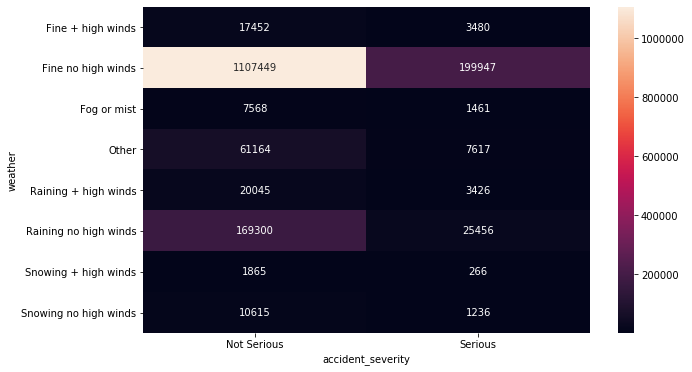

In [9]:
plot_clusterd_heatmap(uk_accidents,'weather','accident_severity');

In [6]:
def plot_clusterd_heatmap2(data,col1,col2,*args):
    plt.figure(figsize=(10,6))
    cat_counts=data.groupby([col1, col2]).size().unstack()
    cat_counts=cat_counts.apply(lambda x:x/x.sum()*100,axis=0) #percentage of values
    ax=sb.heatmap(cat_counts,annot=True,cmap='BrBG_r')
    return ax,ax.hlines(args,*ax.get_xlim(),colors='gold'),\
plt.xlabel(re.sub('_',' ',col2.title())),plt.ylabel(re.sub('_',' ',col1.title())),\
plt.title(f"Avg. {col2.replace('_',' ').title()} by {col1.replace('_',' ').title()}")

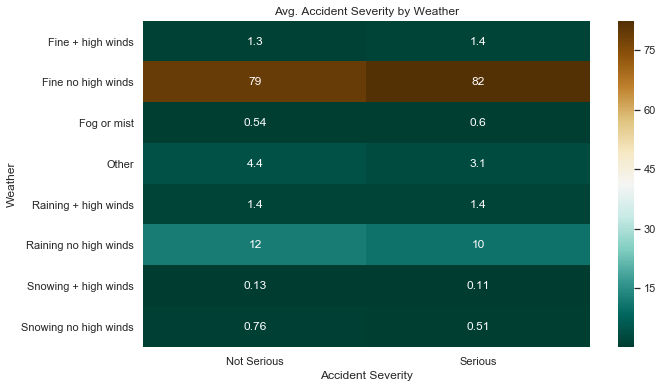

In [116]:
plot_clusterd_heatmap2(uk_accidents,'weather','accident_severity');

Nothing significant.

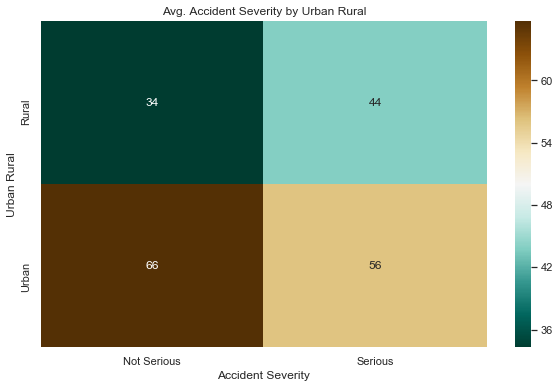

In [117]:
plot_clusterd_heatmap2(uk_accidents.loc[uk_accidents.urban_rural!='Unallocated'],'urban_rural','accident_severity');

#### Nothing significant.

### Was there an impact of road class on accident severity?

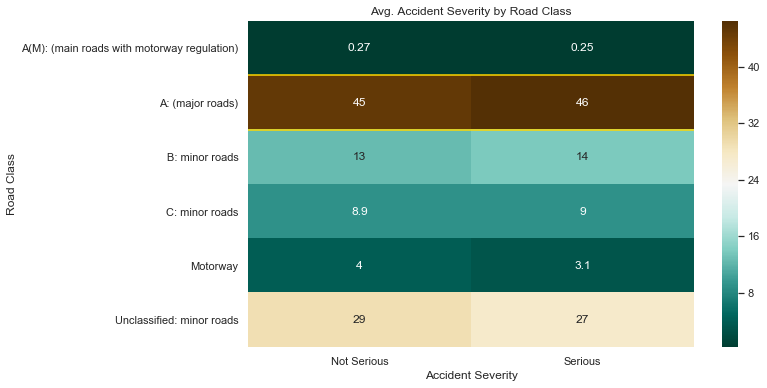

In [162]:
plot_clusterd_heatmap2(uk_accidents,'road_class','accident_severity',[1,2]);

### We can see from the bar chart that most accidents happened on major roads which have high traffic flows.

### Was the accident severity dependent on a social class ?

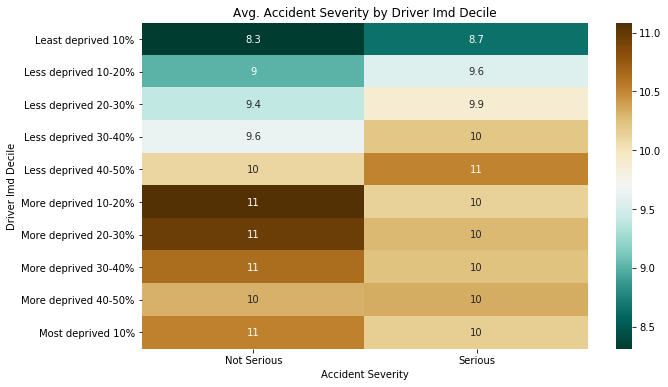

In [7]:
uk_accidents_not_missing=uk_accidents.loc[~uk_accidents.driver_imd_decile.isin(['Missing'])]
plot_clusterd_heatmap2(uk_accidents_not_missing,'driver_imd_decile','accident_severity');

In [10]:
uk_accidents_not_missing.loc[uk_accidents_not_missing.driver_imd_decile.isin([
    'Most deprived 10%','More deprived 10-20%','More deprived 20-30%','More deprived 30-40%','More deprived 40-50%'
]),'driver_imd_decile']= 'More deprived'
uk_accidents_not_missing.loc[uk_accidents_not_missing.driver_imd_decile.isin([
    'Least deprived 10%','Less deprived 10-20%','Less deprived 20-30%','Less deprived 30-40%','Less deprived 40-50%'
]),'driver_imd_decile']= 'Less deprived'

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Was the accident severity dependent on a social class?

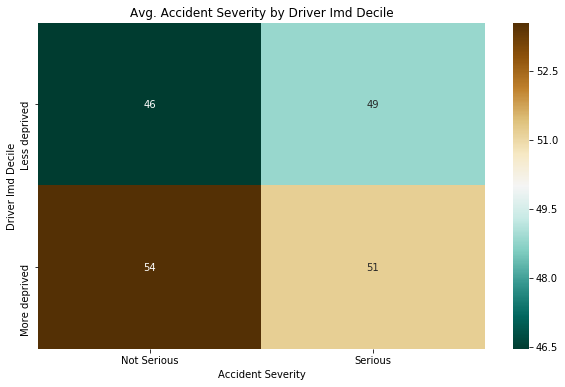

In [11]:
plot_clusterd_heatmap2(uk_accidents_not_missing,'driver_imd_decile','accident_severity');

#### Before we describe what happens in the graph, we sould define what IMD Deprivation means. 
* An Index of Multiple Deprivation [IMD](https://en.wikipedia.org/wiki/Multiple_deprivation_index) is used to identify how deprived an area is. It uses a range of economic, social and housing data to create a single deprivation score for each small area of the country.

* There seven domains of deprivation are considered and weighted as follows:

1- Income Deprivation 22.5 % 

2- Employment Deprivation 22.5%

3- Health Deprivation and Disability 13.5%

4- Education, Skills and Training Deprivation 13.5% 

5- Barriers to Housing and Services 9.3%

6- Crime 9.3%

7- Living Environment Deprivation 9.3%

#### Anyway the graph shows that areas which had more deprivation "with low-quality services" had higher precentage of number of accidents than less deprivation areas, however less deprivation areas had slightly higher precentage of serious accidents than slight accident.

In [51]:
uk_accidents.loc[uk_accidents.vehicle_type.isin(['Motorcycle over 500cc','Motorcycle 125cc and under',\
                                                'Motorcycle 50cc and under','Motorcycle over 125cc and up to 500cc',\
                                                'Motorcycle - unknown cc','Electric motorcycle']),\
                 'vehicle_type']='Motorcycle'

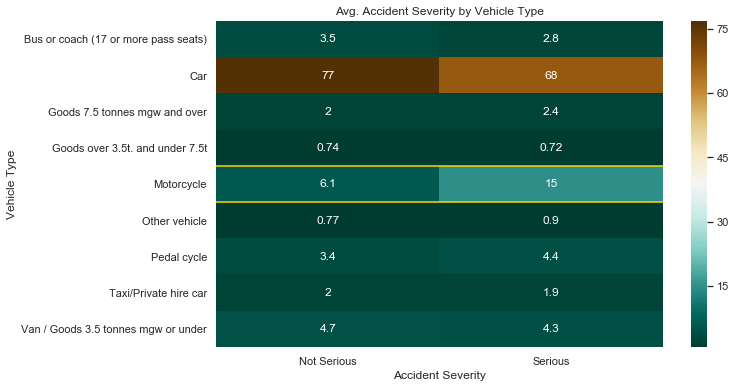

In [52]:
THRESHOLD = 12000 #count >= 80
make_frequency = uk_accidents.vehicle_type.value_counts()
idx = np.sum(make_frequency >= THRESHOLD)

most_vehicles = make_frequency.index[:idx]
plot_clusterd_heatmap2(uk_accidents.loc[uk_accidents.vehicle_type.isin(most_vehicles)],'vehicle_type',\
                       'accident_severity',[4,5]);

### Motorcycles were involved in a significantly higher percentage of serious accidents than not serious accidents.

In [14]:
uk_accidents.number_of_vehicles.value_counts()

2     972942
1     497221
3     130978
4      27846
5       6143
6       1900
7        682
8        333
9        141
10        68
11        29
12        17
13        12
14        11
16         6
15         3
18         3
19         2
20         2
34         1
17         1
21         1
22         1
28         1
29         1
32         1
67         1
Name: number_of_vehicles, dtype: int64

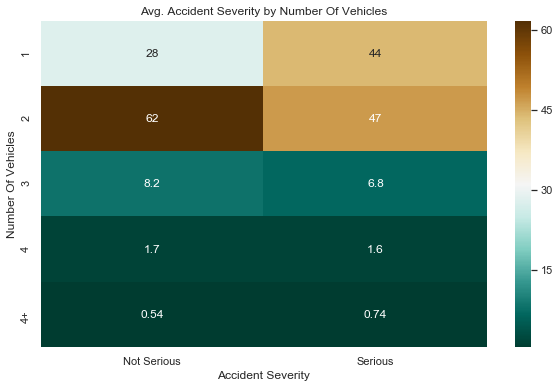

In [134]:
uk_accidents.loc[uk_accidents.number_of_vehicles>4,'number_of_vehicles'] = '4+'
plot_clusterd_heatmap2(uk_accidents,'number_of_vehicles','accident_severity');

Nothing significant!

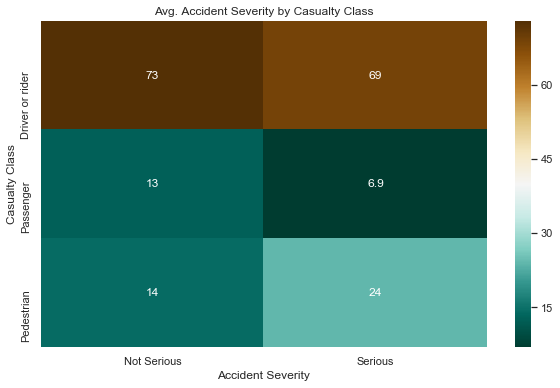

In [137]:
plot_clusterd_heatmap2(uk_accidents,'casualty_class','accident_severity');

In [ ]:
#driver,pedestrian,passenger 

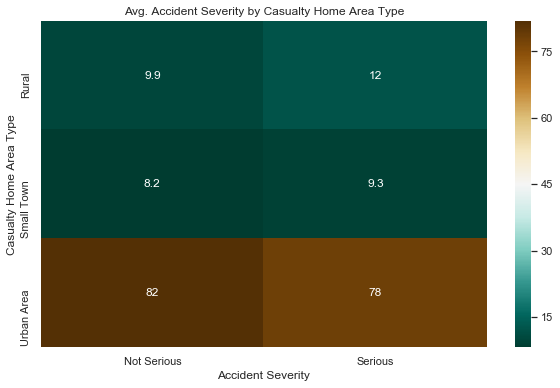

In [138]:
plot_clusterd_heatmap2(uk_accidents,'casualty_home_area_type','accident_severity');

Nothing significant

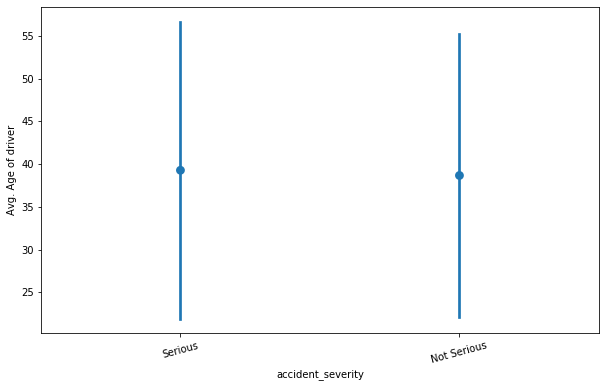

In [17]:
plt.figure(figsize=[10,6])
sb.pointplot(data=uk_accidents, x='accident_severity', y='age_of_driver', ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Age of driver');

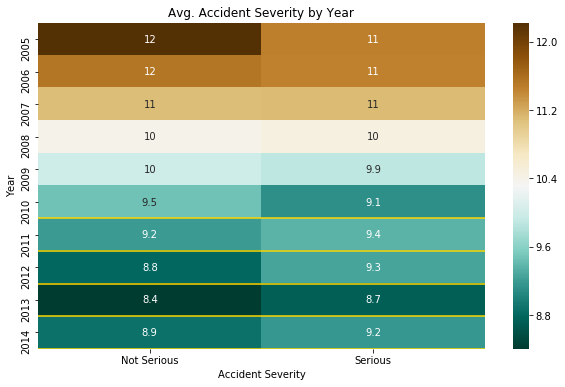

In [12]:
plot_clusterd_heatmap2(uk_accidents,'year','accident_severity',[6,7,8,9,10]);

#### from 2011 to 2014,There has been a slightly spike in percentage of serious accidents than Not serious accidents. 

In [24]:
uk_accidents.columns

Index(['accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'day_of_week', 'local_authority_district', 'road_class', 'road_type',
       'speed_limit', 'junction_detail', 'light_conditions', 'weather',
       'road_surface', 'urban_rural', 'police_officer_attend', 'hour', 'month',
       'year', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location', 'junction_location', 'veh_leaving_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive', 'journey_purpose',
       'sex_of_driver', 'age_of_driver', 'age_of_vehicle', 'driver_imd_decile',
       'driver_home_area_type', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'casualty_severity', 'ped_location', 'ped_movement',
       'car_passenger', 'bus_passenger', 'casualty_type',
       'casualty_home_area_type', 'vehicle_propulsion_code'],
      dtype='object')

In [25]:
uk_accidents.light_conditions.value_counts()

Daylight                       1199942
Darkness - lights lit           321911
Darkness - no lighting           91643
Darkness - lighting unknown      17388
Darkness - lights unlit           7463
Name: light_conditions, dtype: int64

In [28]:
uk_accidents.age_of_vehicle.value_counts()

7      298095
8      272891
6      119629
9      107685
5       97748
        ...  
89          1
81          1
77          1
67          1
110         1
Name: age_of_vehicle, Length: 84, dtype: int64

In [7]:
uk_accidents_sample=uk_accidents.sample(10000,replace=True)
uk_accidents_sample.age_of_vehicle.value_counts()

8+     3008
7.0    1835
8.0    1623
6.0     716
1.0     614
5.0     593
3.0     548
4.0     540
2.0     523
Name: age_of_vehicle, dtype: int64

In [8]:
uk_accidents.age_of_vehicle.value_counts()

8+     494052
7.0    298095
8.0    272891
6.0    119629
5.0     97748
1.0     91377
4.0     90738
2.0     86934
3.0     86883
Name: age_of_vehicle, dtype: int64

In [ ]:
uk_accidents.loc[uk_accidents.age_of_vehicle >8,'age_of_vehicle']='8+'

### What was the relation between age of vehicle and accident severity?

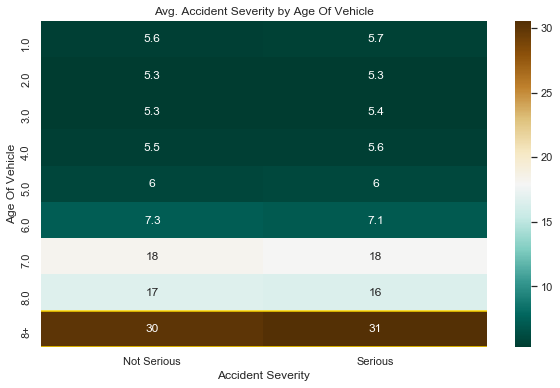

In [161]:
plot_clusterd_heatmap2(uk_accidents,'age_of_vehicle','accident_severity',[8,9]);

### There were a strong relationship between age of vehicle and accident severity, the older the car, the more accidents it gets into, so oldest vehicles(+8) were involved more in accidents than newest vehicles. 

In [61]:
uk_accidents.road_type.value_counts()

Single carriageway    1225401
Dual carriageway       242546
Roundabout             109784
One way street          33825
Slip road               17185
Unknown                  9606
Name: road_type, dtype: int64

In [10]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [11]:
uk_accidents['day_time']=uk_accidents['hour'].apply(when_was_it)

### When did accidents usually happen?

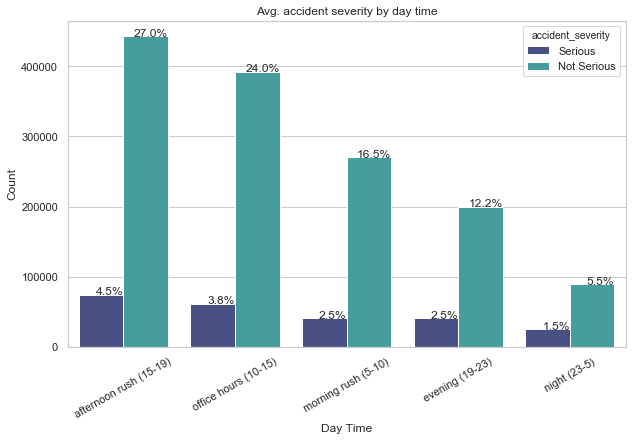

In [51]:
sb.set(style="whitegrid")
plt.figure(figsize=(10,6))

counts = uk_accidents['day_time'].value_counts()
n_day_time=uk_accidents['day_time'].value_counts().sum()

ax = sb.countplot(data = uk_accidents, x = 'day_time', hue = 'accident_severity',\
             palette='mako',order=uk_accidents.day_time.value_counts().index)
plt.xlabel('Day Time')
plt.ylabel('Count')
plt.title('Avg. accident severity by day time')
plt.xticks(rotation=30)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n_day_time)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()


### Most accidents have been happened at afternoon rush and office hours than other period of day. 

In [37]:
# sb.scatterplot(uk_accidents.speed_limit,uk_accidents.number_of_casualties);

In [37]:
#age_band
uk_accidents.age_of_driver.value_counts()

18    60193
19    49404
30    48747
20    47062
21    46644
      ...  
90      694
8       626
7       459
6       335
5       196
Name: age_of_driver, Length: 86, dtype: int64

In [39]:
uk_accidents.age_of_driver.min() , uk_accidents.age_of_driver.max()

(5, 90)

In [42]:
bin_names=['5-15','15-25','25-35','35-45','45-55','55-65','65-75','over 75']
bin_edges=[5,15,25,35,45,55,65,75,90]
uk_accidents['age_band_of_driver']=pd.cut(uk_accidents.age_of_driver,bin_edges,labels=bin_names)

In [43]:
uk_accidents.age_band_of_driver.value_counts()

15-25      421896
25-35      367834
35-45      331073
45-55      224900
55-65      153596
65-75       68082
over 75     59101
5-15        11669
Name: age_band_of_driver, dtype: int64

### Did age has an effect on accident severity? 

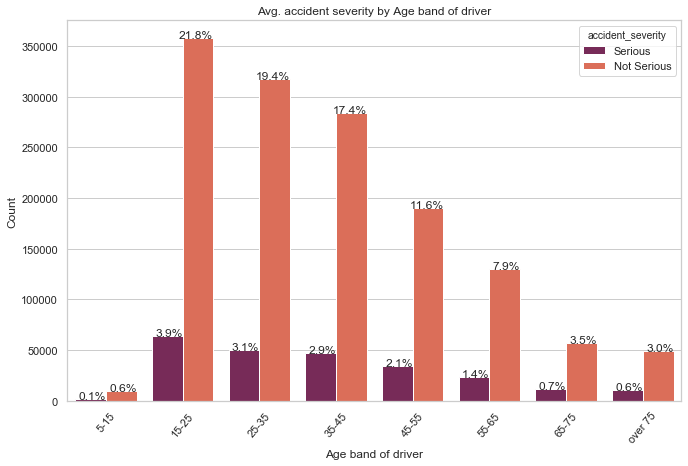

In [49]:
sb.set(style="whitegrid")
plt.figure(figsize=(11,7))

counts = uk_accidents['age_band_of_driver'].value_counts()
n_age_band=uk_accidents['age_band_of_driver'].value_counts().sum()

ax = sb.countplot(data = uk_accidents, x = 'age_band_of_driver', hue = 'accident_severity',\
             palette='rocket')
plt.xlabel('Age band of driver')
plt.ylabel('Count')
plt.title('Avg. accident severity by Age band of driver')
plt.xticks(rotation=50)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n_age_band)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

### People from 15 to 45 seemed more impulsive, they had higher percentage of serious accidents, than age bands above 45. 

### Road Type Vs Speed Limit

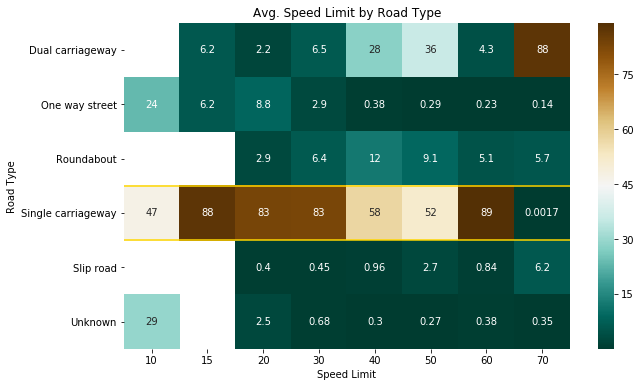

In [16]:
plot_clusterd_heatmap2(uk_accidents,'road_type','speed_limit',[3,4]);

### Single carriageway had the heighest precentage of speed limit of all accidents, and espcially in 60 mph, it might explain why Single carriageway had the heighest precentange of serious accidents, as following graph shows. however we need more clearification in multivariate section.

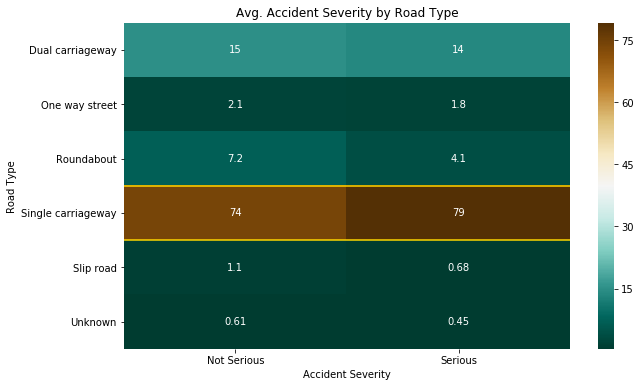

In [15]:
plot_clusterd_heatmap2(uk_accidents,'road_type','accident_severity',[3,4]);

In [40]:
# from scipy import stats

In [59]:
# sb.jointplot(x=uk_accidents_sample.age_of_vehicle,y=uk_accidents_sample.accident_severity).annotate(stats.chisquare);

In [45]:
# sb.jointplot(x=uk_accidents_sample.age_of_vehicle,y=uk_accidents_sample.number_of_casualties).annotate(stats.chisquare);

In [ ]:
# sb.jointplot(x=uk_accidents.age_of_driver,y=uk_accidents.age_of_casualty,kind='kde').annotate(stats.pearsonr);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Bivariate Summary:

Road Class: most accidents happened on major roads which have high traffic flows.

Driver IMD deprivation decile: areas which had more deprivation "with low-quality services" had higher precentage of number of accidents than less deprivation areas, however less deprivation areas had slightly higher precentage of serious accidents than slight accident.

Vehicle Type: Motorcycles were involved in a significantly higher percentage of serious accidents than not serious accidents.

Year: from 2011 to 2014,There has been a slightly spike in percentage of serious accidents than Not serious accidents.

Age of vehicle: There were a strong relationship between age of vehicle and accident severity, the older the car, the more accidents it gets into, so oldest vehicles(+8) were involved more in accidents than newest vehicles.

Day time: Most accidents have been happened at afternoon rush and office hours than other period of day.

Age band of driver: People from 15 to 45 seemed more impulsive, they had higher percentage of serious accidents, than age bands above 45.

weather: Nothing significant.

urban rural: Nothing significant.

number of vehicles: Nothing significant.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, There was a strong relation between road type and speed limit:
Single carriageway had the heighest precentage of speed limit of all accidents, and espcially in 60 mph, which explains why Single carriageway had the heighest precentange of serious accidents.¶


<a id='mu'></a>
## Multivariate Exploration

In [51]:
# pivot=pd.pivot_table(uk_accidents,values='speed_limit',index= 'road_type',columns= 'accident_severity',aggfunc ='mean')
# # sb.heatmap(pivot, annot=True, cmap=sns.cm.rocket_r,fmt='.2%',annot_kws={"size": 10})
# pivot

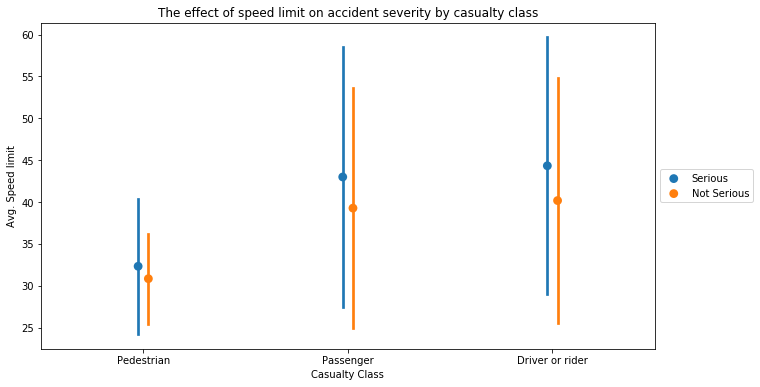

In [55]:
plt.figure(figsize=(11,6))
sb.pointplot(data=uk_accidents,x='casualty_class',y='speed_limit',hue='accident_severity',ci='sd',linestyles="",dodge=True);
# g.map(sb.boxplot,'casualty_class',);
plt.ylabel('Avg. Speed limit')
plt.xlabel('Casualty Class')
plt.title('The effect of speed limit on accident severity by casualty class')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Driver or rider and passenger have been had serious accidents when speed limit was high.

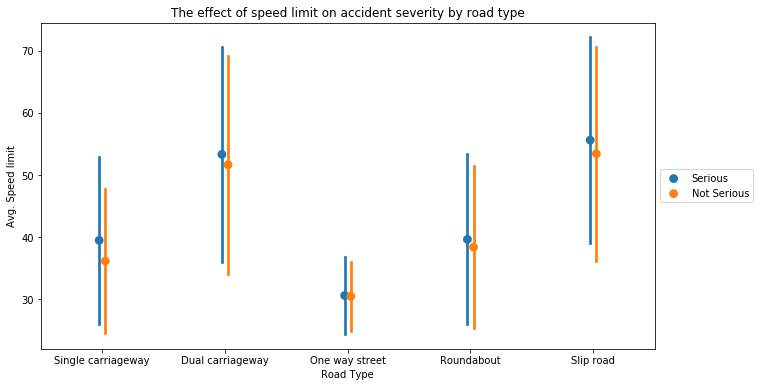

In [54]:
plt.figure(figsize=(11,6))
sb.pointplot(data=uk_accidents.loc[~uk_accidents.road_type.isin(['Unknown'])],x='road_type',y='speed_limit',\
             hue='accident_severity',ci='sd',linestyles="",dodge=True)
plt.ylabel('Avg. Speed limit')
plt.xlabel('Road Type')
plt.title('The effect of speed limit on accident severity by road type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### High speed usually caused serious accidents on slip road and dual carriageway road.

Defination of slip road:

a short road that is used to get on or off a major road or highway


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There were significant relation between Speed limit, Casualty class, accident severity:
heigh speed caused serious accidents, and casualty class who have had more serious accidents were (driver or rider and passenger)

### Were there any interesting or surprising interactions between features?

Yes, in bivariate analysis section we found that single carriageway had more serious accidents, but when I Measured the seriouness of accident by speed limit, it interestingly shows that slip roads and dual carriageway were more deadly with heigh speed driving.